In [449]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from scipy.io.arff import loadarff
#from pymfe.mfe import MFE
#import arff

file1 = 'file1.arff'
file2 = 'Project.arff'
#raw_data = arff.load(open(file1, 'r'))['data']
raw_data = loadarff(file1)
weka_data = loadarff(file2)
df_data = pd.DataFrame(raw_data[0])
str_df = df_data.select_dtypes([object,np.float64])
str_df = str_df.stack().str.decode('utf-8').unstack()
df_data.select_dtypes([object,np.float64])
df_weka = pd.DataFrame(weka_data[0])

In [395]:
df_data.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'G

In [401]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_data.columns if df_data[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
print(features_with_na)
for feature in features_with_na:
    print(feature, np.round(df_data[feature].isnull().mean(), 4),  ' % missing values')
    print(feature)
print("here2")

[]
here2


In [402]:
for feature in features_with_na:
    data = df_data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [438]:
# list of numerical variables
numerical_features = [feature for feature in df_data.columns if df_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_data[numerical_features].columns

Number of numerical variables:  35


Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Year_Sold', 'Sale_Price',
       'Longitude', 'Latitude'],
      dtype='object')

In [404]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['Year_Built', 'Year_Remod_Add', 'Year_Sold']

In [406]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, df_data[feature].unique())

Year_Built [1960. 1961. 1958. 1968. 1997. 1998. 2001. 1992. 1995. 1999. 1993. 1990.
 1985. 2003. 1988. 2010. 1951. 1978. 1977. 1974. 2000. 1970. 1971. 1975.
 2009. 2007. 2005. 2004. 2002. 2006. 1996. 1994. 2008. 1980. 1979. 1984.
 1920. 1965. 1967. 1963. 1962. 1976. 1972. 1966. 1959. 1964. 1950. 1952.
 1949. 1940. 1954. 1955. 1957. 1956. 1953. 1948. 1900. 1910. 1927. 1915.
 1945. 1929. 1938. 1923. 1928. 1890. 1885. 1922. 1925. 1939. 1942. 1936.
 1930. 1921. 1912. 1917. 1907. 1875. 1969. 1947. 1946. 1987. 1941. 1924.
 1914. 1931. 1919. 1989. 1896. 1973. 1991. 1981. 1986. 1916. 1926. 1935.
 1892. 1898. 1880. 1882. 1937. 1902. 1934. 1982. 1983. 1932. 1918. 1904.
 1905. 1872. 1893. 1906. 1908. 1911. 1895. 1879. 1901. 1913.]
Year_Remod_Add [1960. 1961. 1958. 1968. 1998. 2001. 1992. 1996. 1999. 1994. 2007. 1990.
 1985. 2003. 2005. 2010. 1951. 1988. 1977. 1974. 2000. 1970. 2008. 1971.
 1975. 1978. 2006. 2004. 2002. 1995. 2009. 1980. 1979. 1984. 1981. 1950.
 1967. 1963. 1993. 1966. 1959. 1964.

Text(0.5, 1.0, 'House Price vs YearSold')

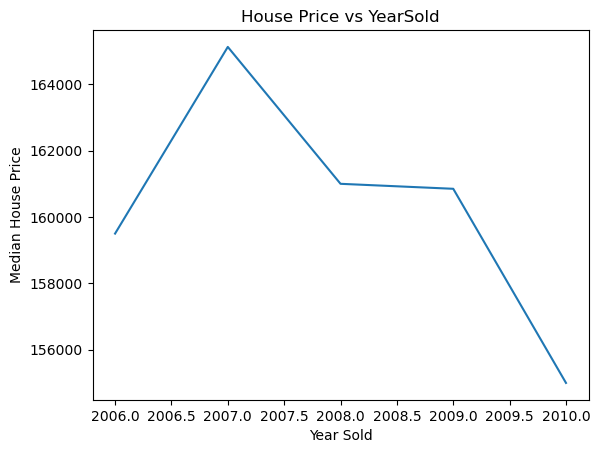

In [409]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df_data.groupby('Year_Sold')['Sale_Price'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



In [410]:
year_feature

['Year_Built', 'Year_Remod_Add', 'Year_Sold']

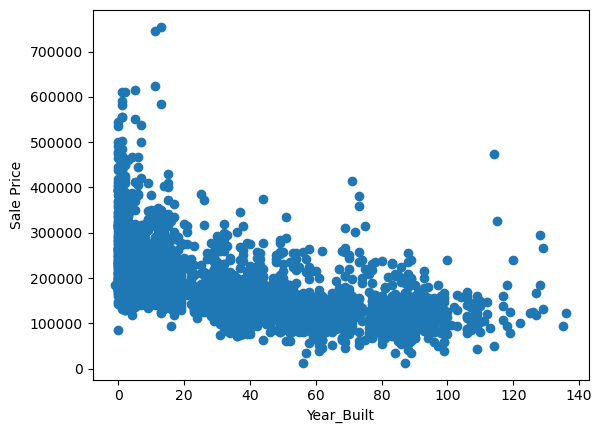

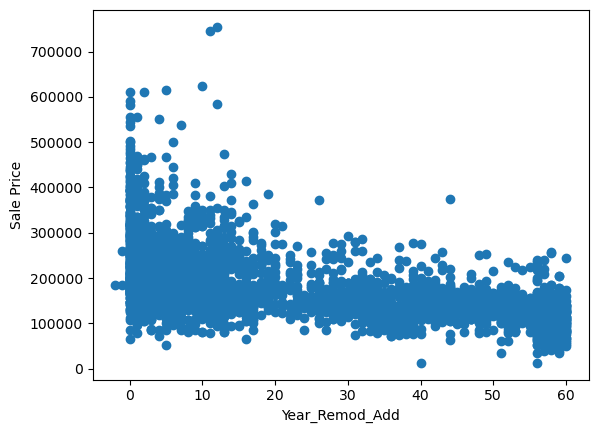

In [412]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='Year_Sold':
        data=df_data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['Year_Sold']-data[feature]

        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()


In [413]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_data[feature].unique())<25 
                  and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
#%%


Discrete Variables Count: 12


In [414]:
discrete_feature

['BsmtFin_SF_1',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'TotRms_AbvGrd',
 'Fireplaces',
 'Garage_Cars',
 'Pool_Area',
 'Mo_Sold']

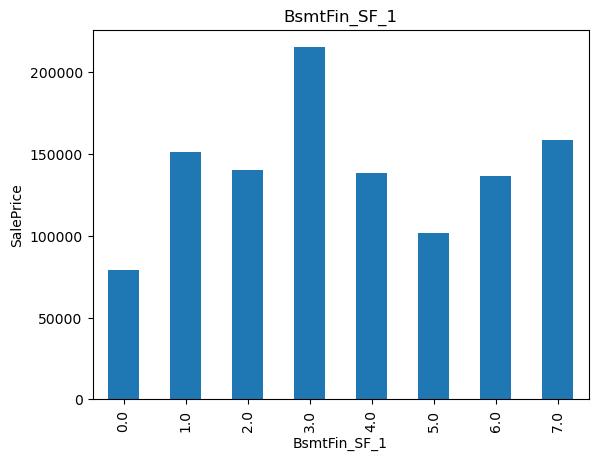

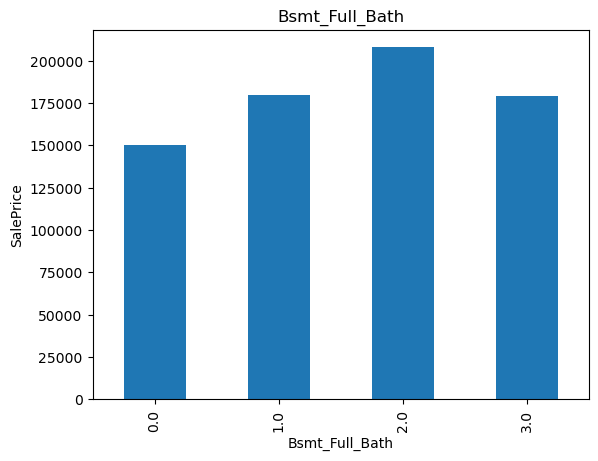

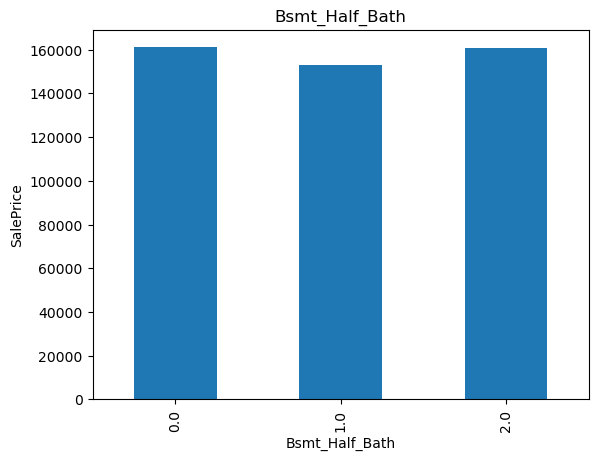

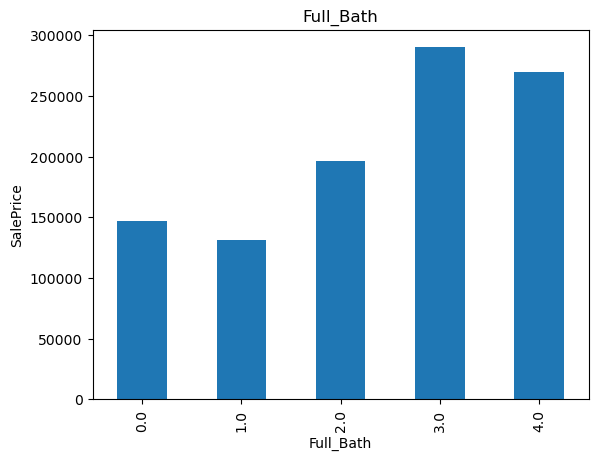

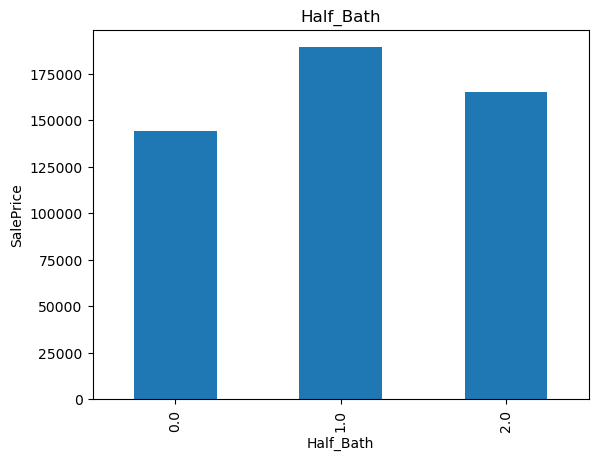

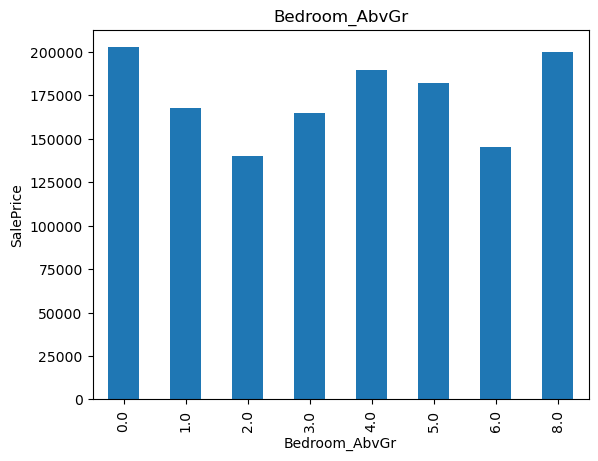

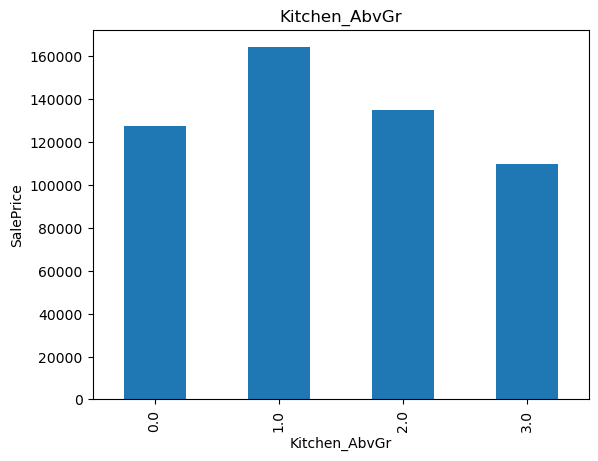

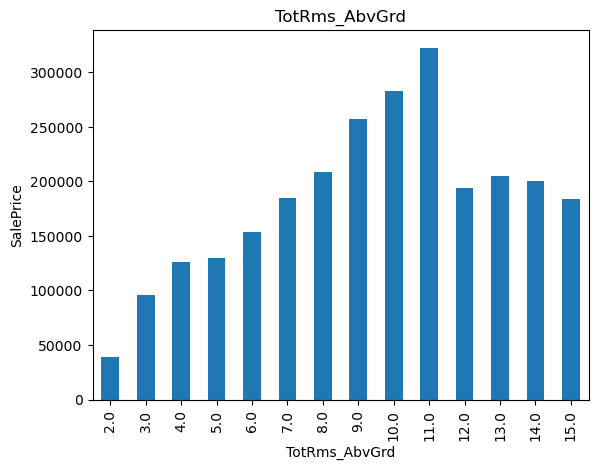

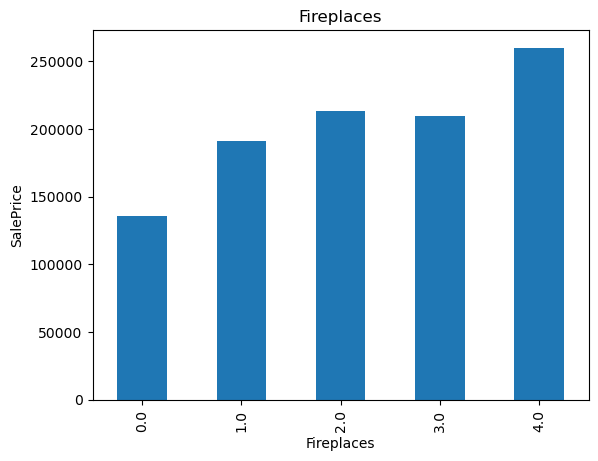

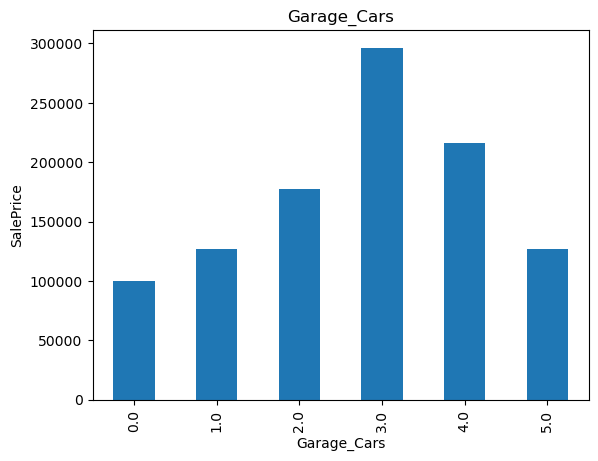

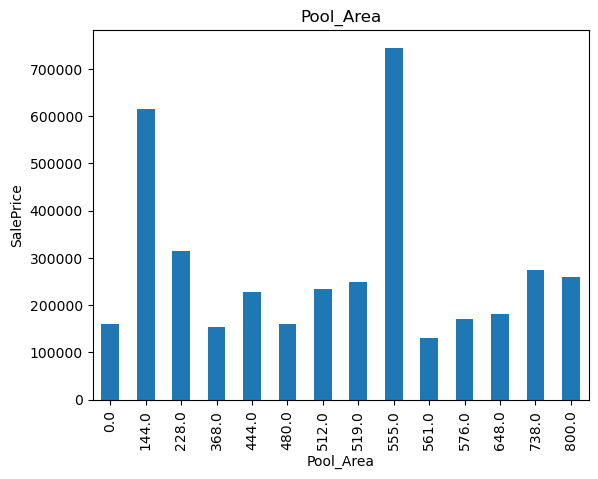

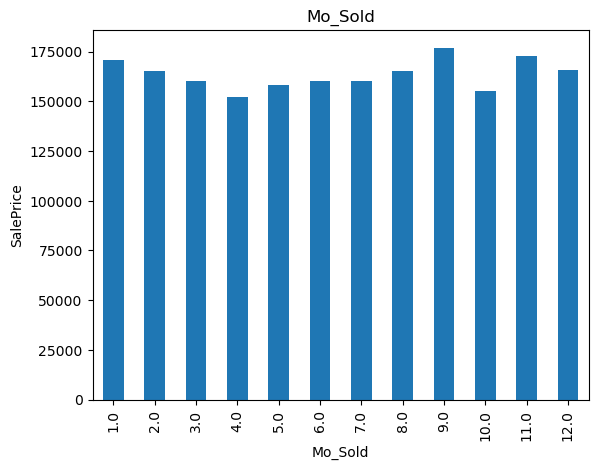

In [415]:
## Lets Find the relationship between them and Sale PRice

for feature in discrete_feature:
    data=df_data.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [417]:
#### Continuous Variable

In [418]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 20


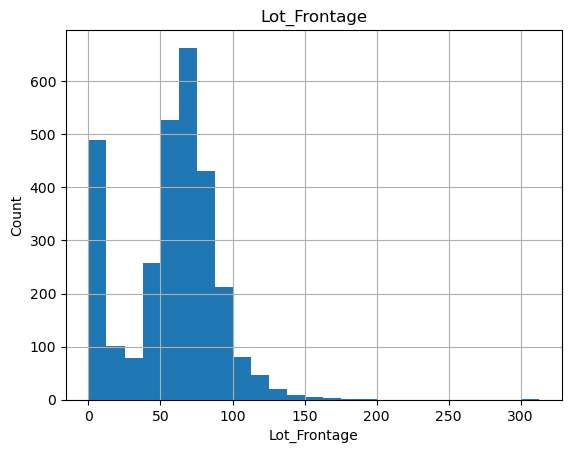

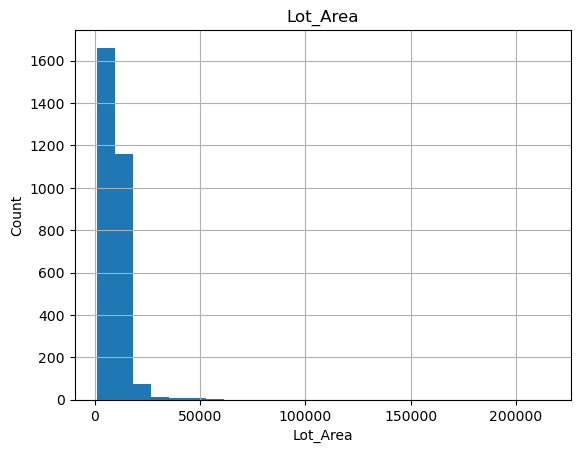

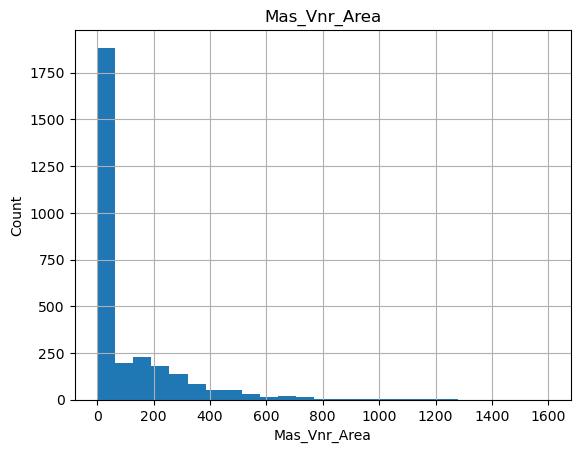

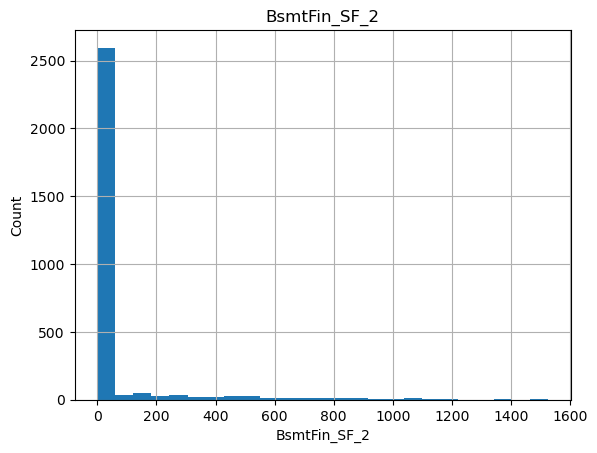

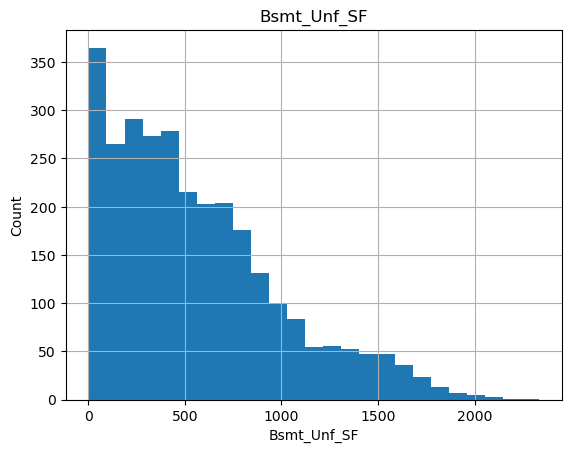

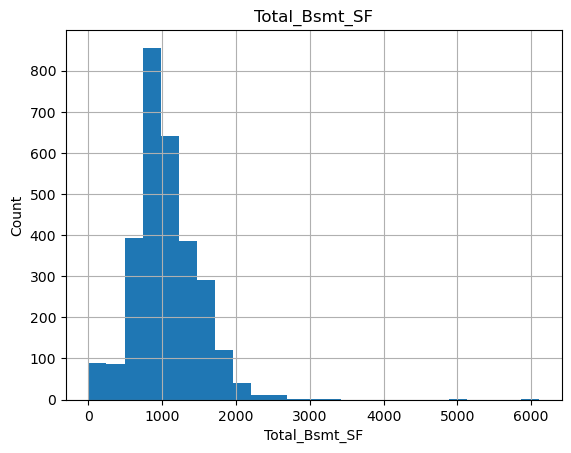

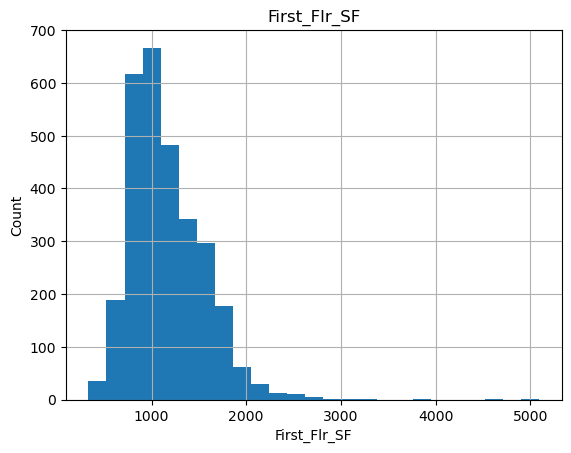

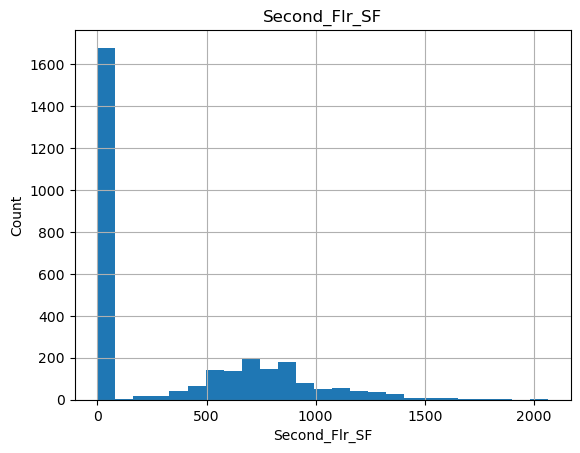

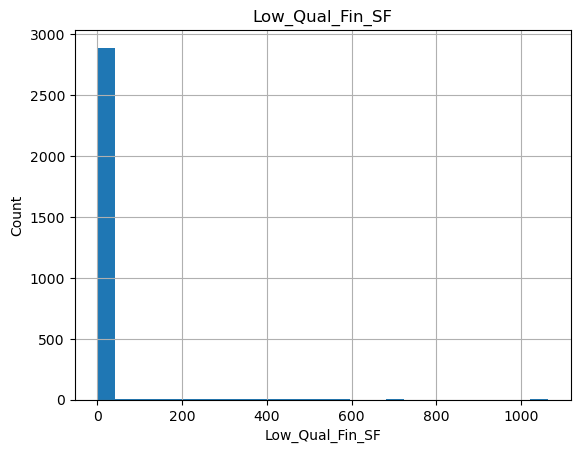

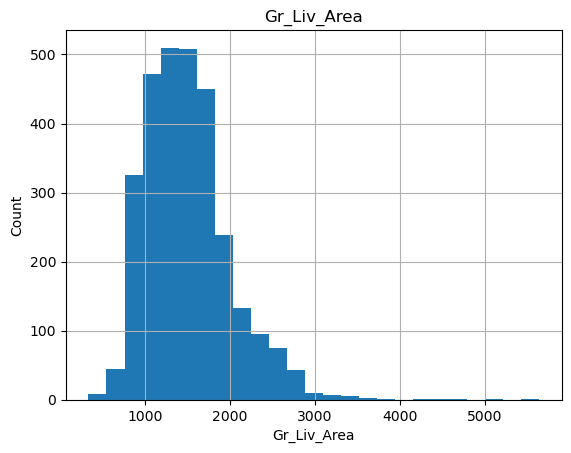

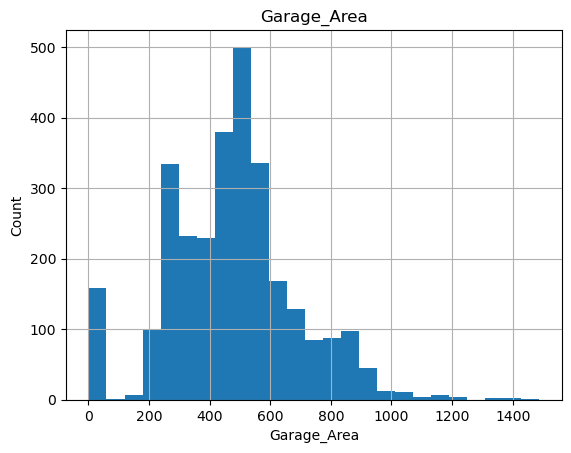

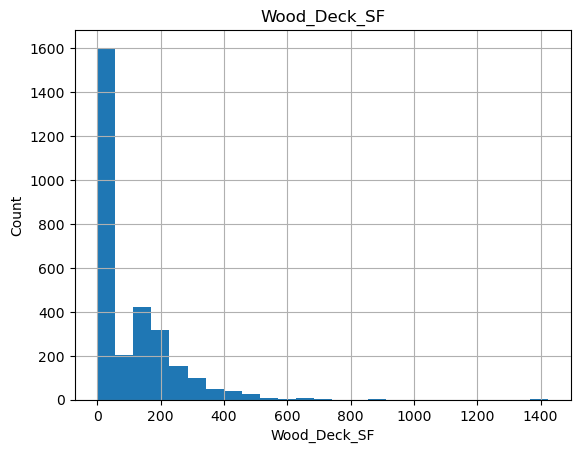

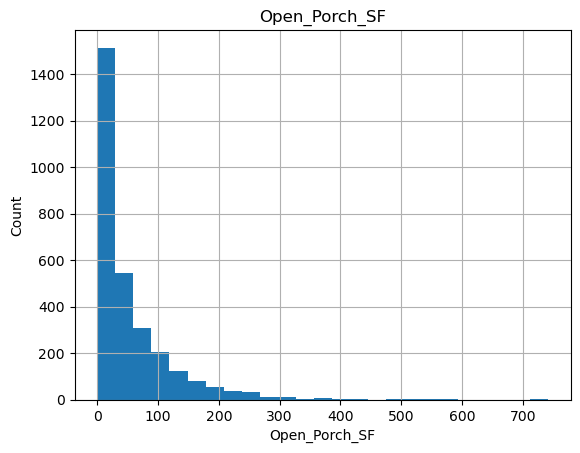

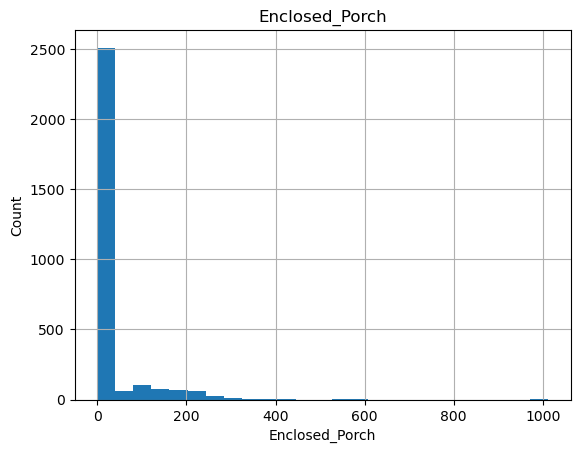

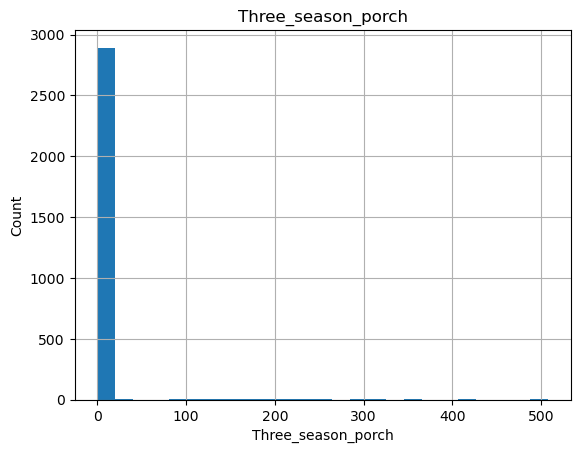

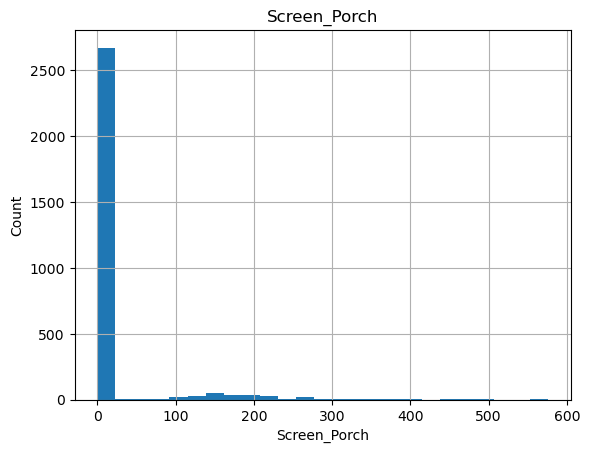

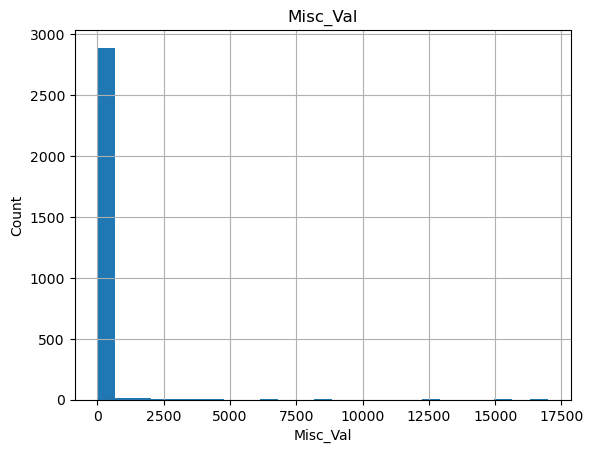

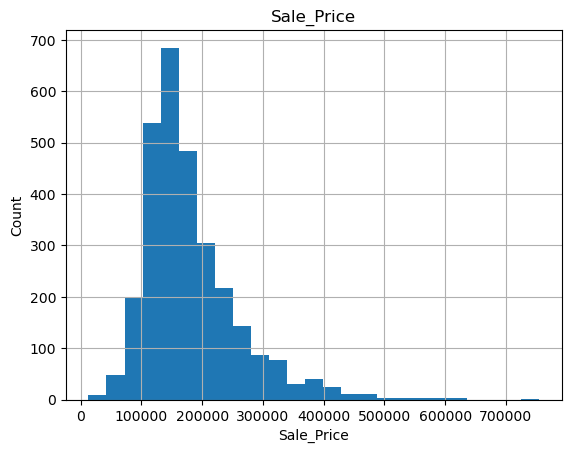

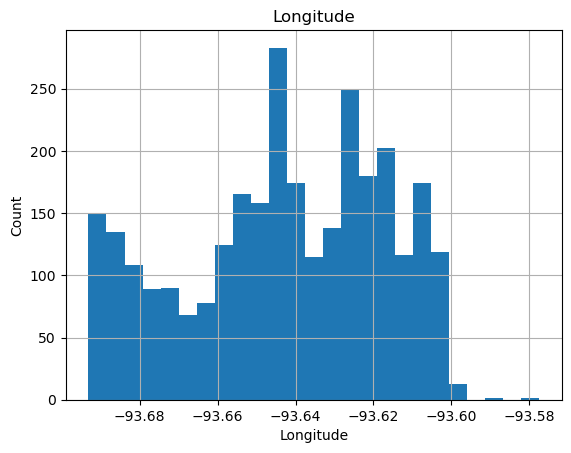

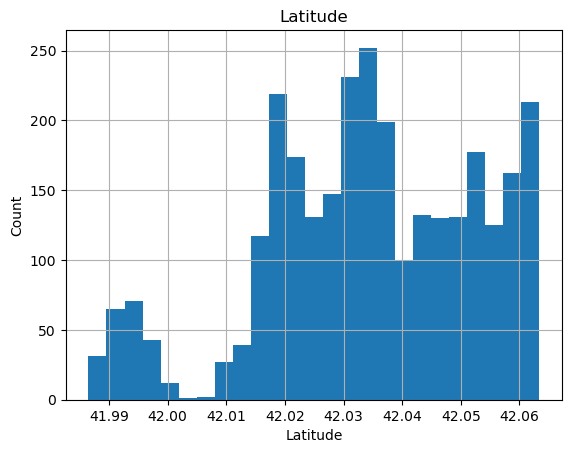

In [419]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

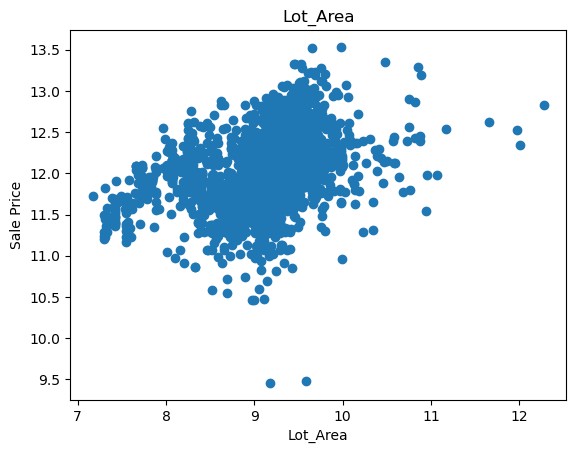

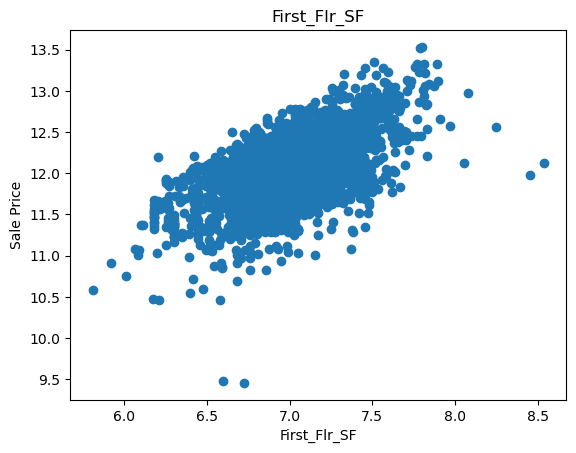

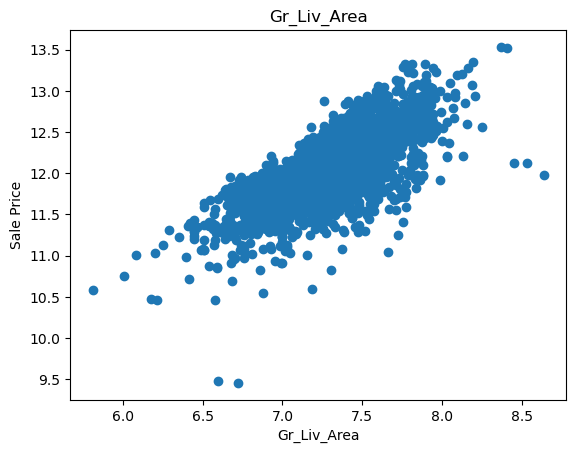

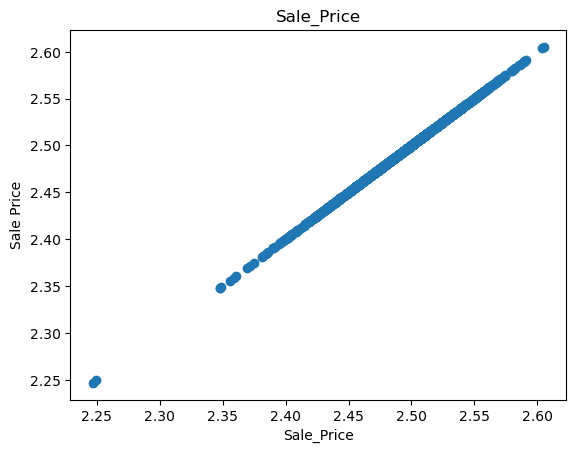

E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


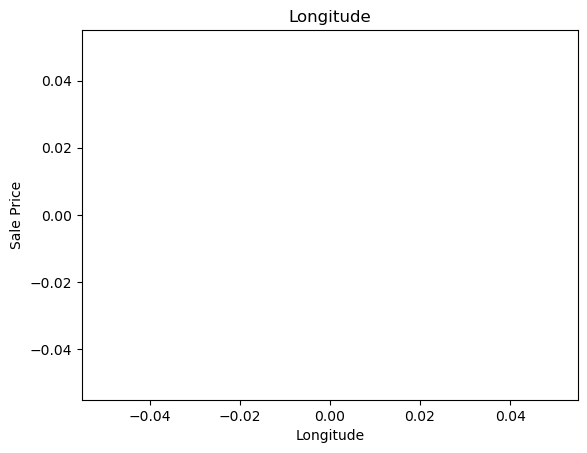

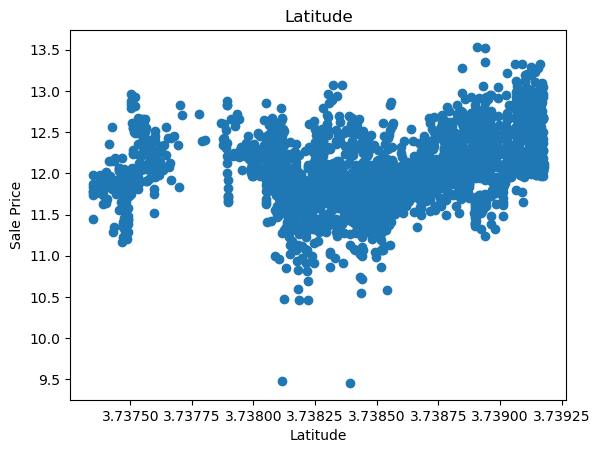

In [420]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=df_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Sale_Price']=np.log(data['Sale_Price'])
        plt.scatter(data[feature],data['Sale_Price'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature)
        plt.show()

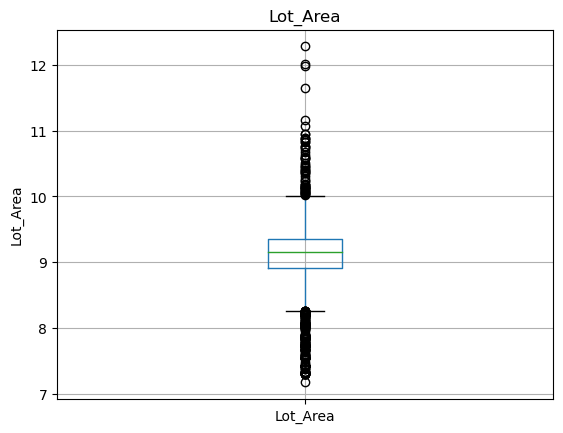

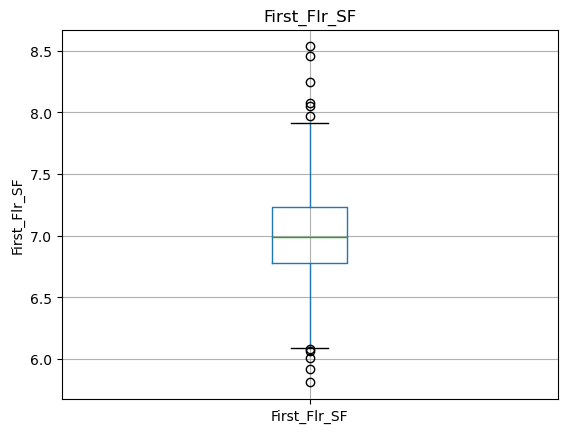

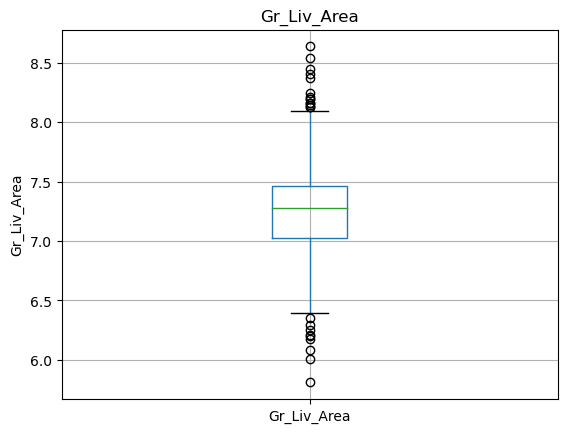

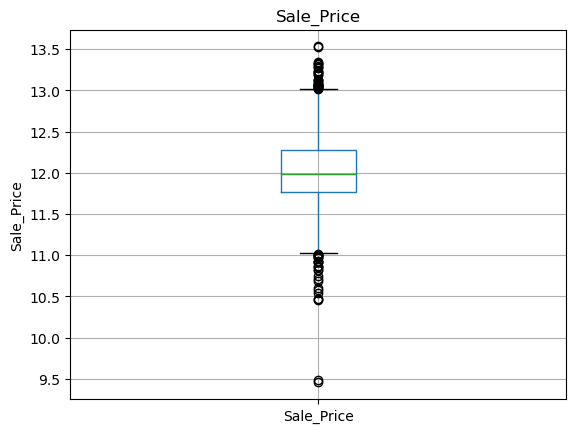

E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


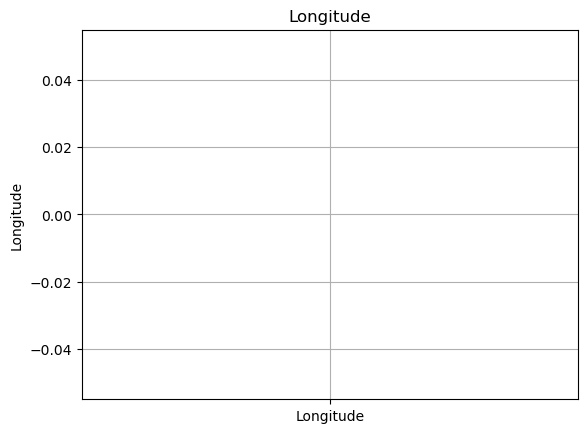

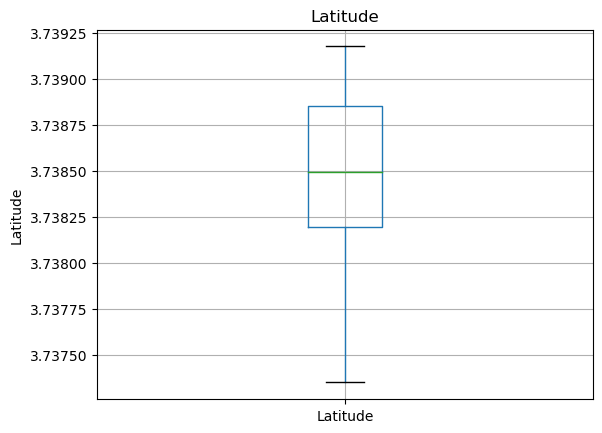

In [421]:
for feature in continuous_feature:
    data=df_data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [425]:
categorical_features=[feature for feature in df_data.columns if df_data[feature].dtypes=='O']
df_data[categorical_features].head()

,MS_SubClass,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
0,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',b'Gtl',b'North_Ames',...,b'Attchd',b'Fin',b'Typical',b'Typical',b'Partial_Pavement',b'No_Pool',b'No_Fence',b'None',b'WD ',b'Normal'
1,b'One_Story_1946_and_Newer_All_Styles',b'Residential_High_Density',b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',b'Gtl',b'North_Ames',...,b'Attchd',b'Unf',b'Typical',b'Typical',b'Paved',b'No_Pool',b'Minimum_Privacy',b'None',b'WD ',b'Normal'
2,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',b'Gtl',b'North_Ames',...,b'Attchd',b'Unf',b'Typical',b'Typical',b'Paved',b'No_Pool',b'No_Fence',b'Gar2',b'WD ',b'Normal'
3,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Corner',b'Gtl',b'North_Ames',...,b'Attchd',b'Fin',b'Typical',b'Typical',b'Paved',b'No_Pool',b'No_Fence',b'None',b'WD ',b'Normal'
4,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Inside',b'Gtl',b'Gilbert',...,b'Attchd',b'Fin',b'Typical',b'Typical',b'Paved',b'No_Pool',b'Minimum_Privacy',b'None',b'WD ',b'Normal'


In [426]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_data[feature].unique())))

The feature is MS_SubClass and number of categories are 16
The feature is MS_Zoning and number of categories are 7
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is Lot_Shape and number of categories are 4
The feature is Land_Contour and number of categories are 4
The feature is Utilities and number of categories are 3
The feature is Lot_Config and number of categories are 5
The feature is Land_Slope and number of categories are 3
The feature is Neighborhood and number of categories are 28
The feature is Condition_1 and number of categories are 9
The feature is Condition_2 and number of categories are 8
The feature is Bldg_Type and number of categories are 5
The feature is House_Style and number of categories are 8
The feature is Overall_Qual and number of categories are 10
The feature is Overall_Cond and number of categories are 9
The feature is Roof_Style and number of categories are 6
The feature is Roof_Matl and 

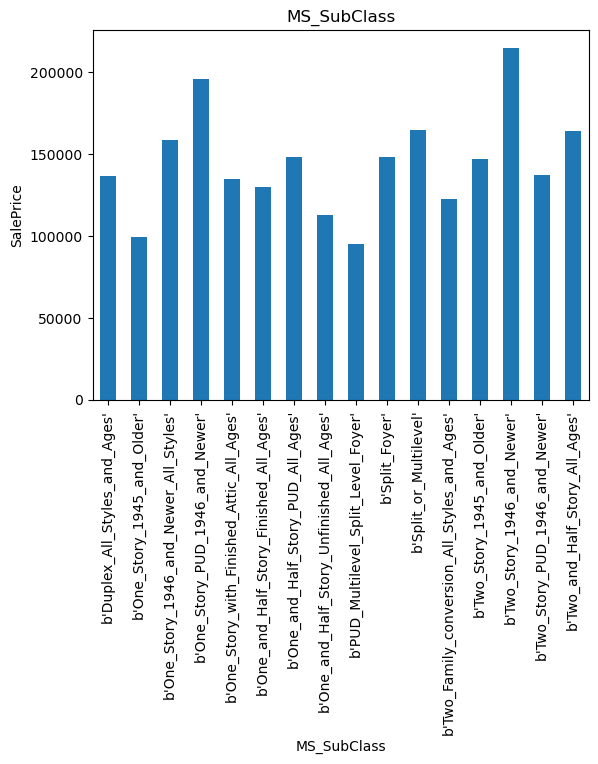

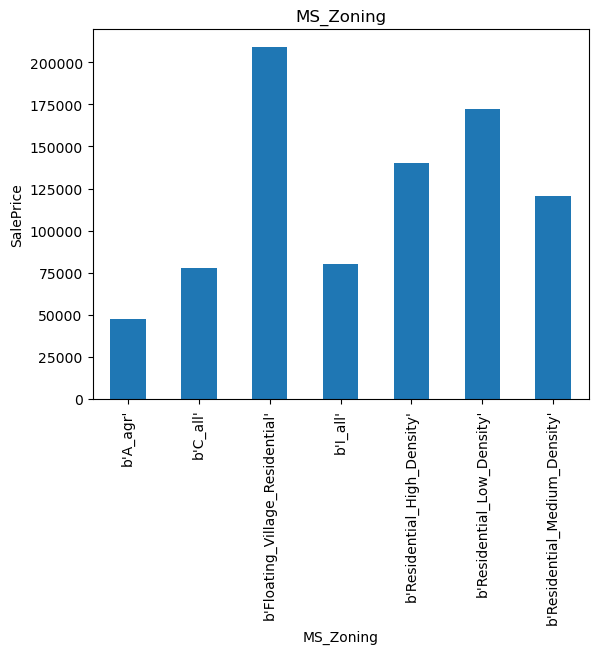

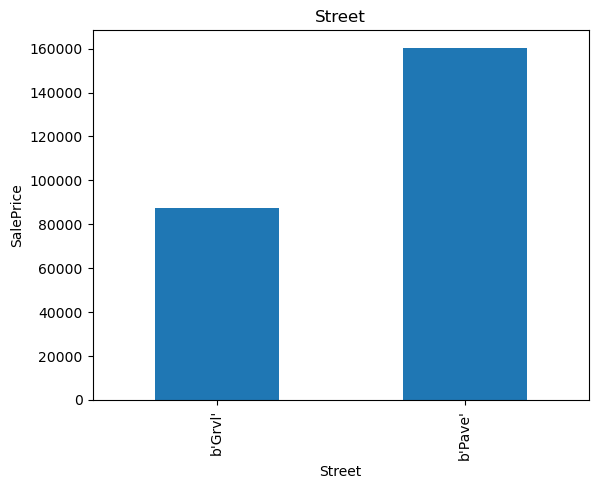

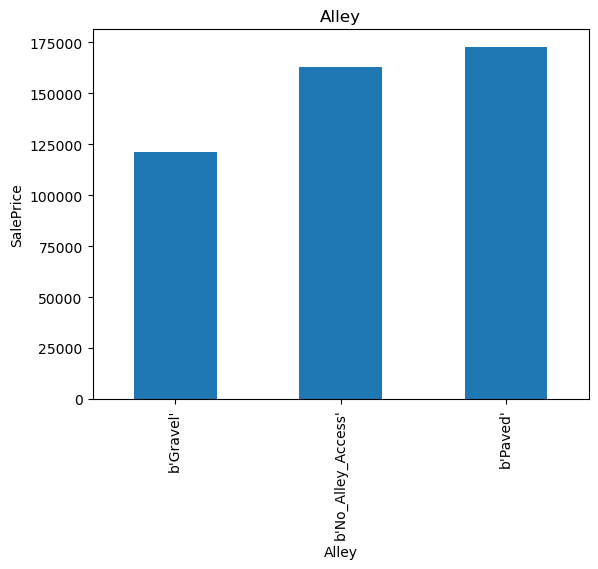

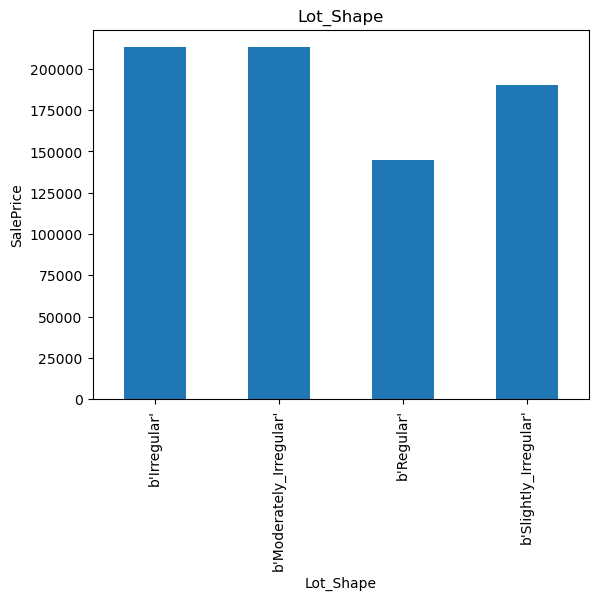

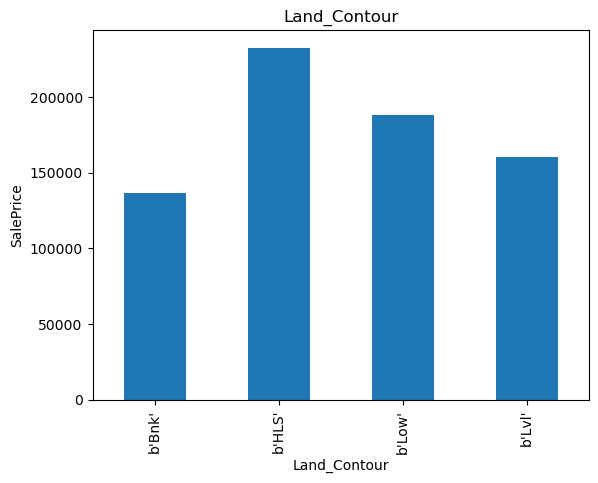

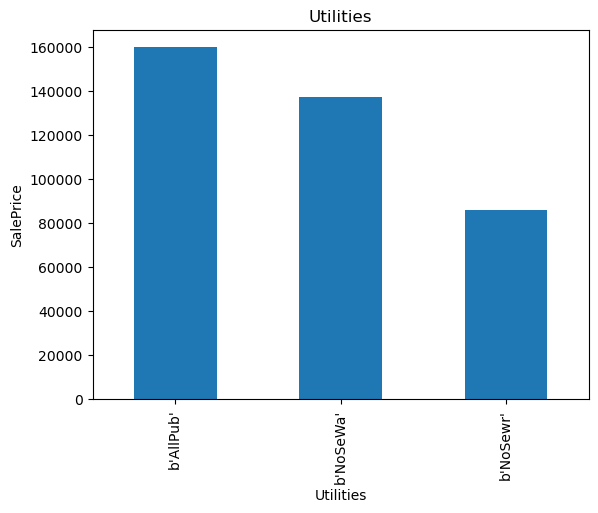

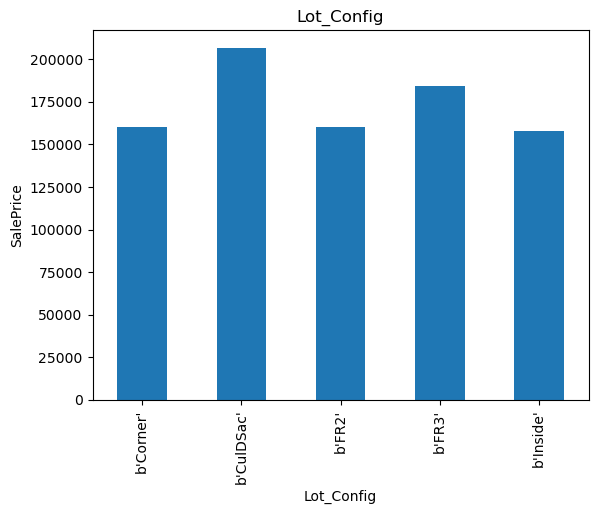

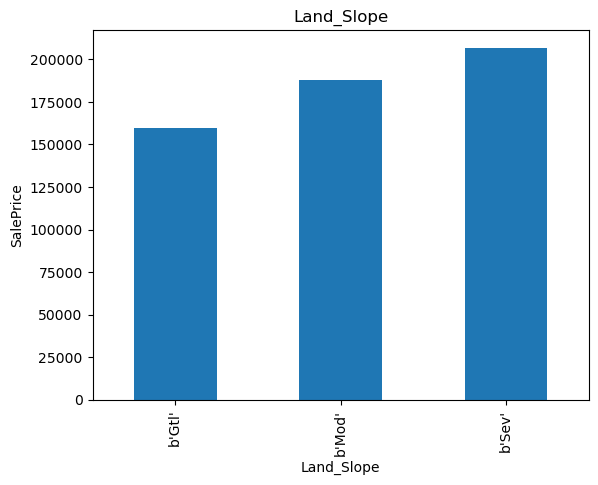

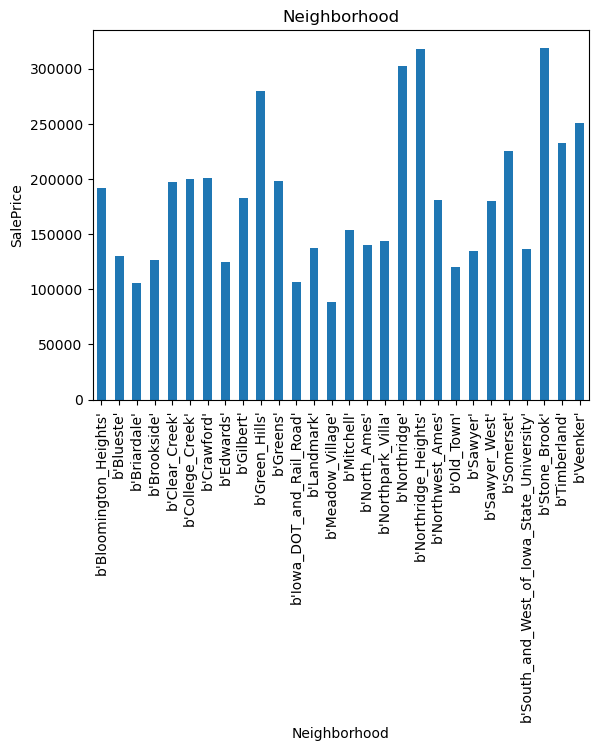

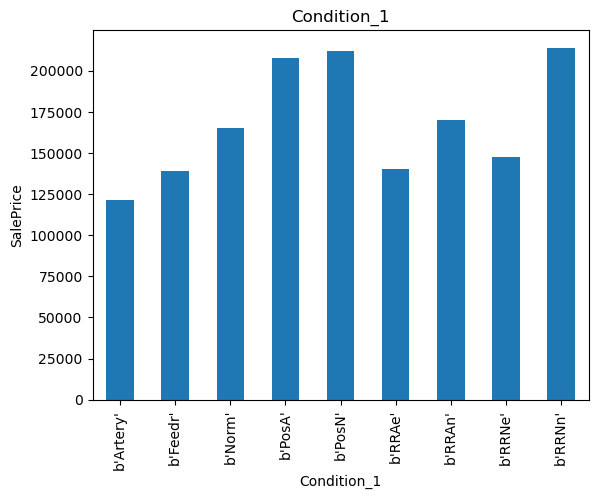

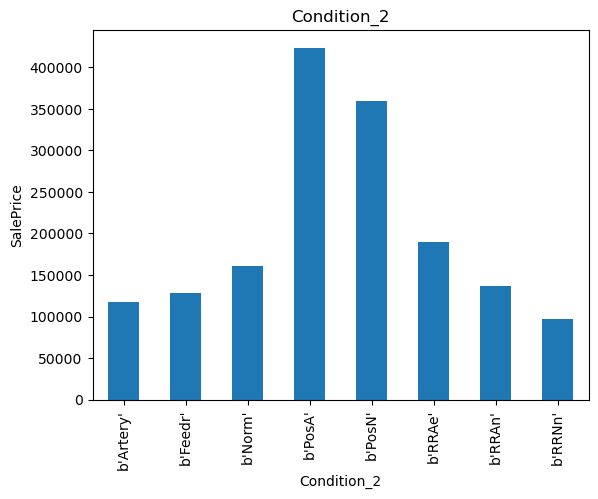

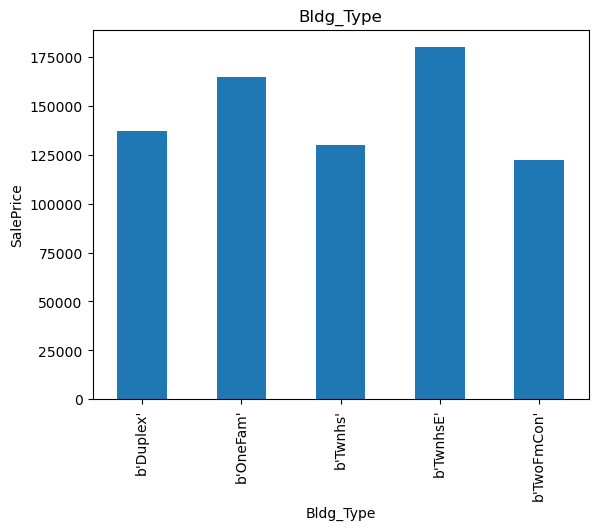

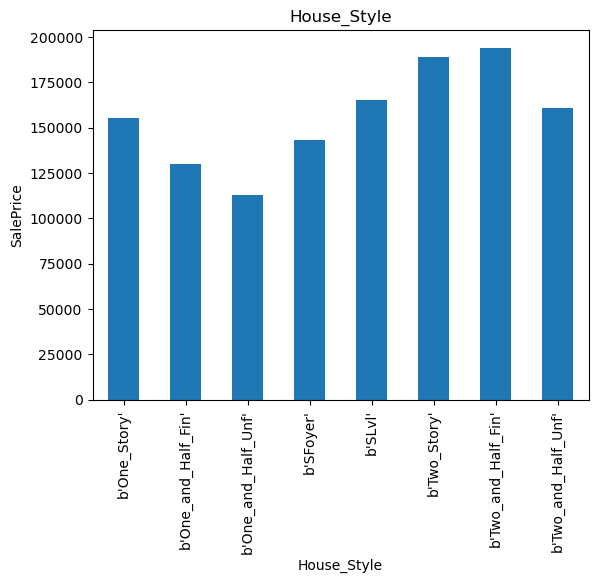

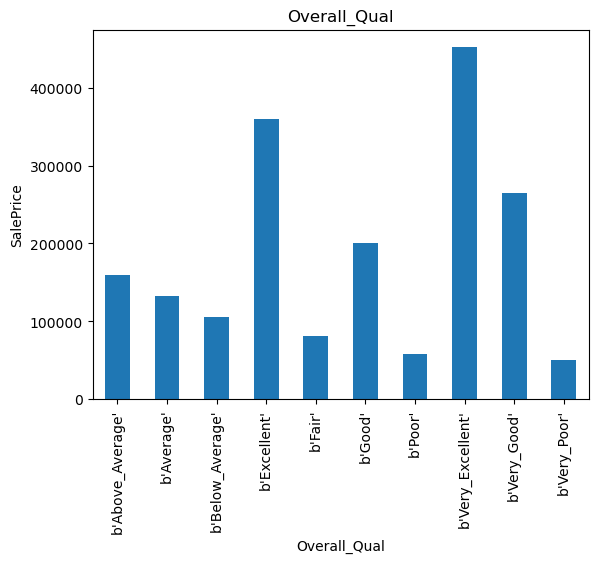

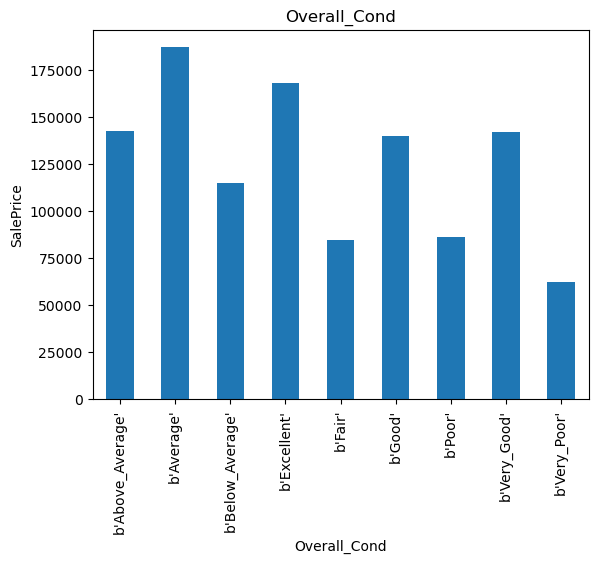

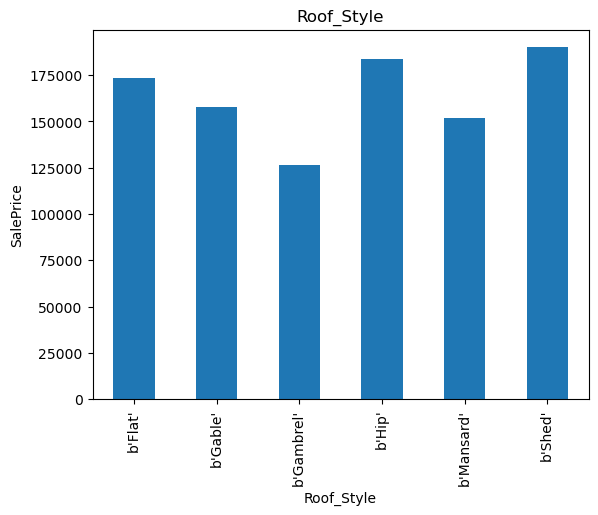

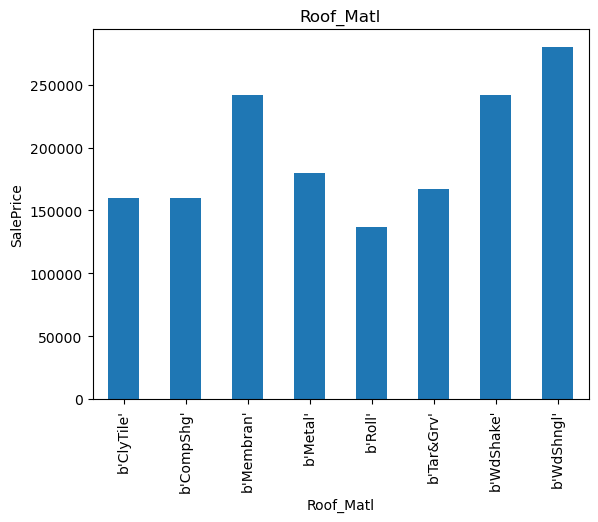

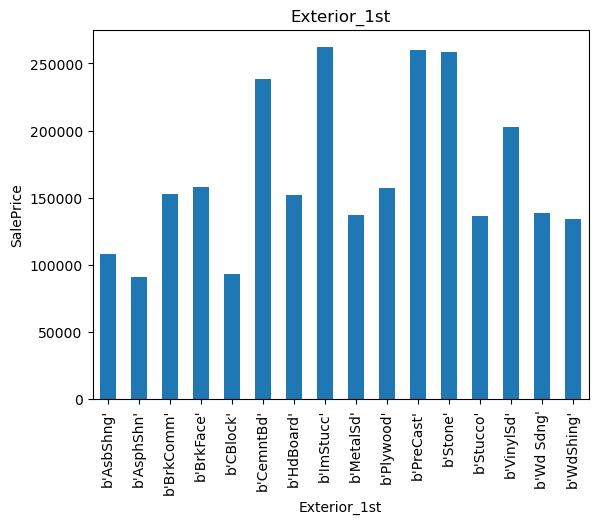

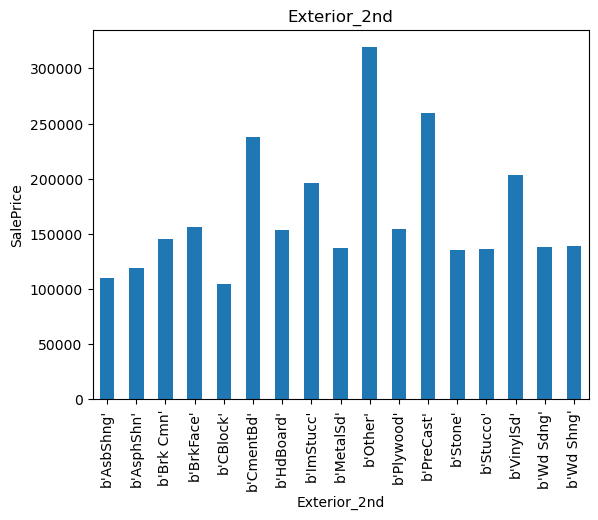

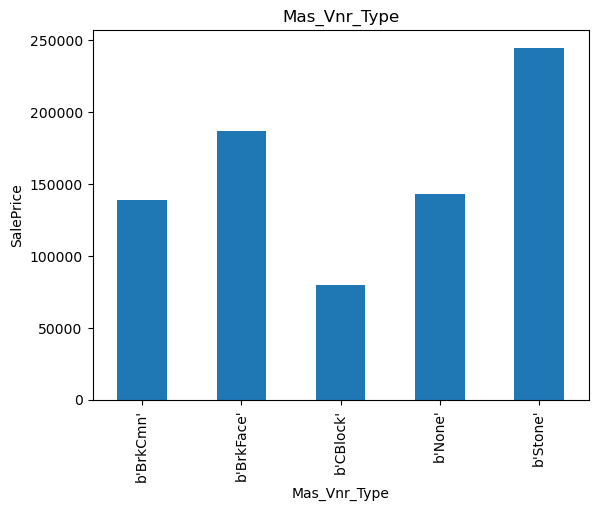

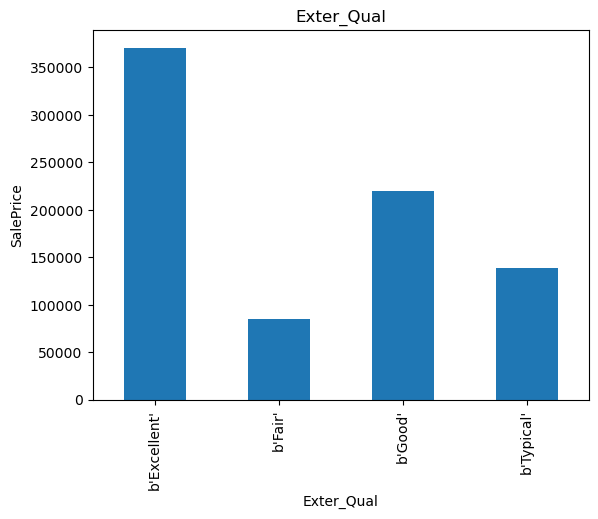

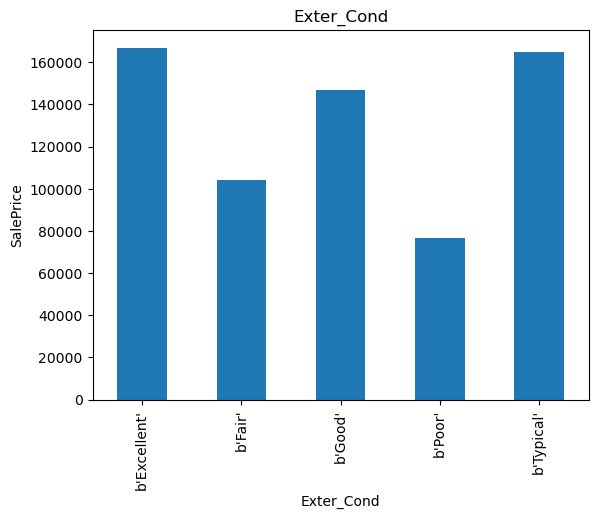

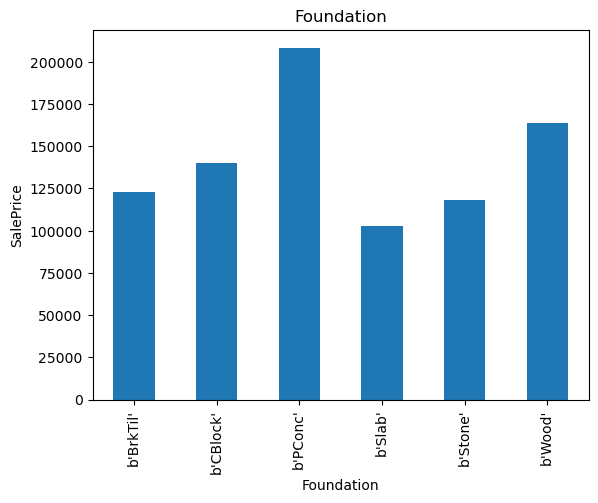

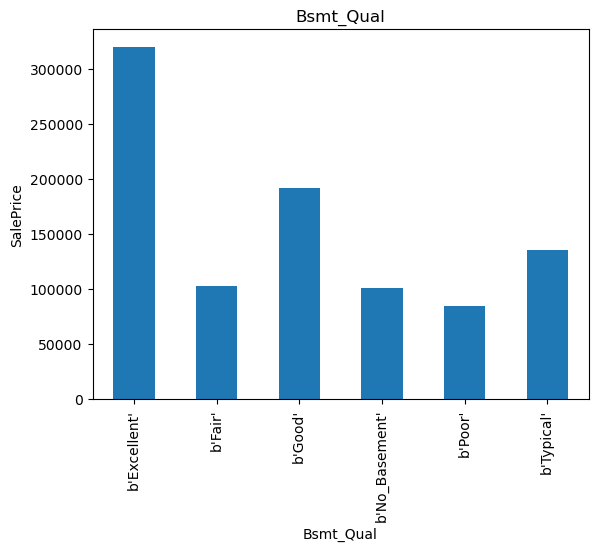

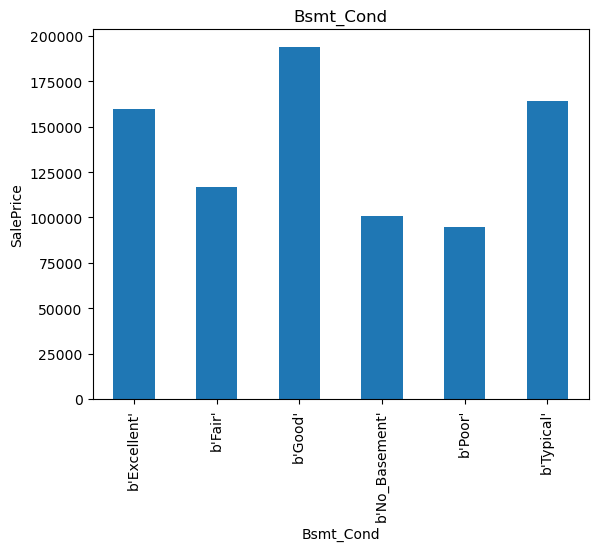

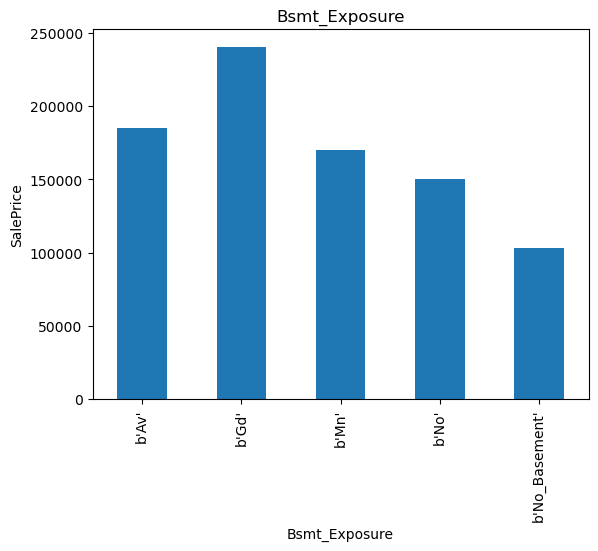

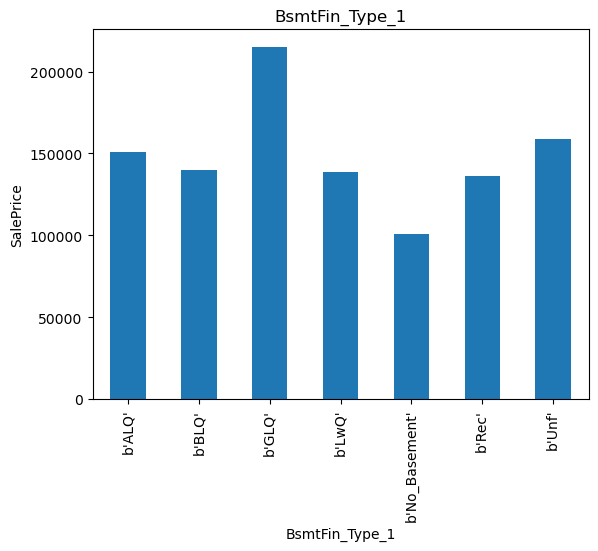

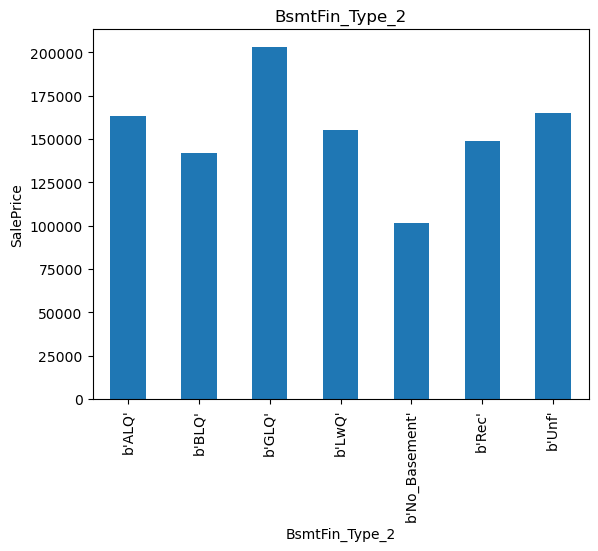

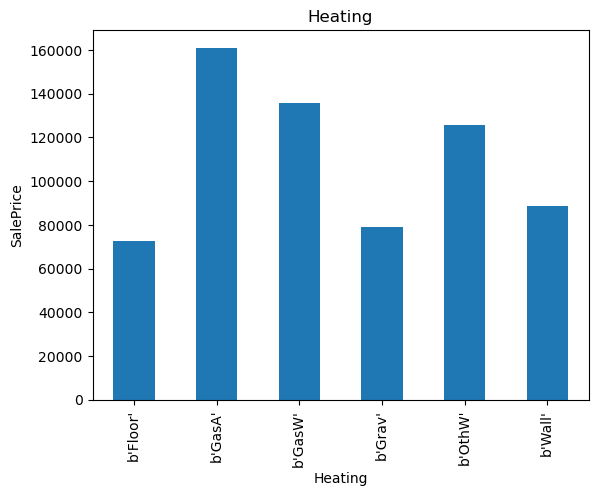

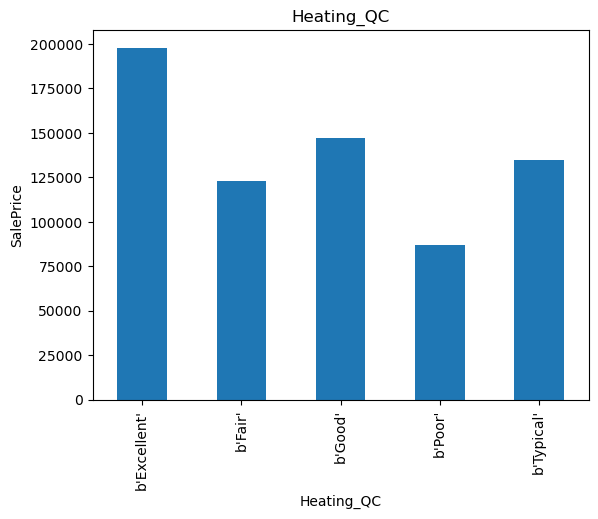

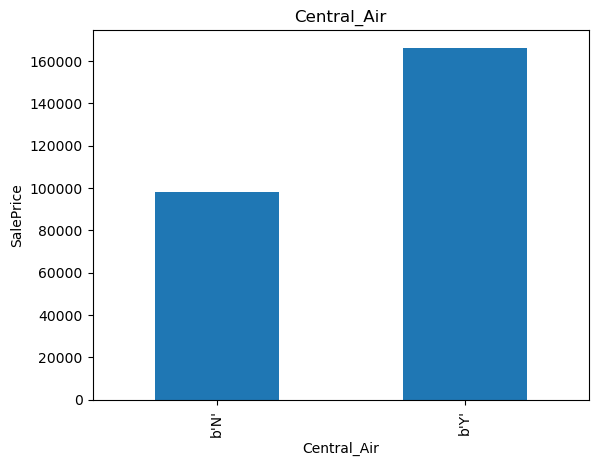

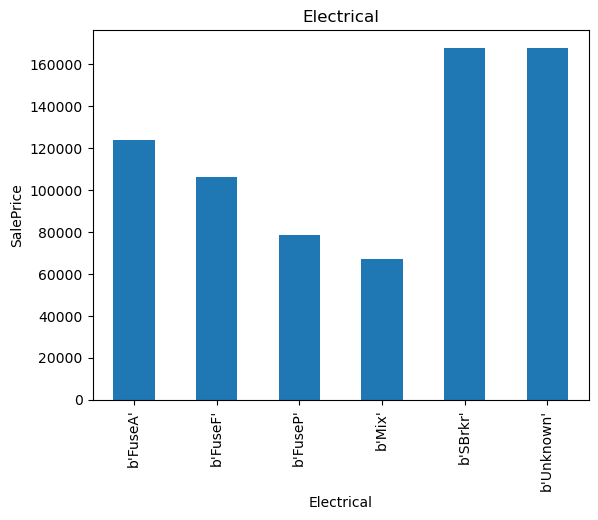

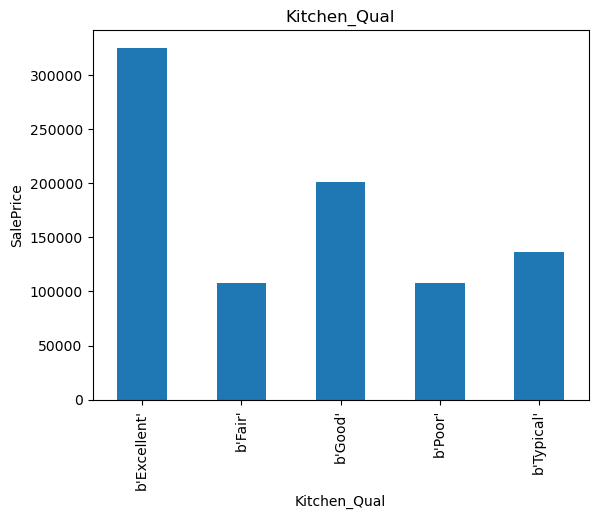

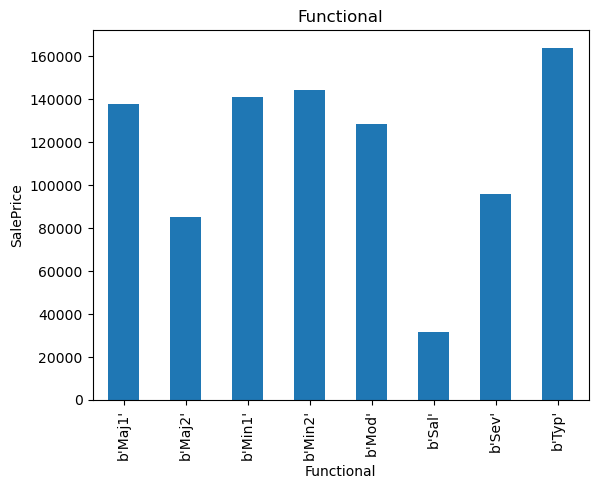

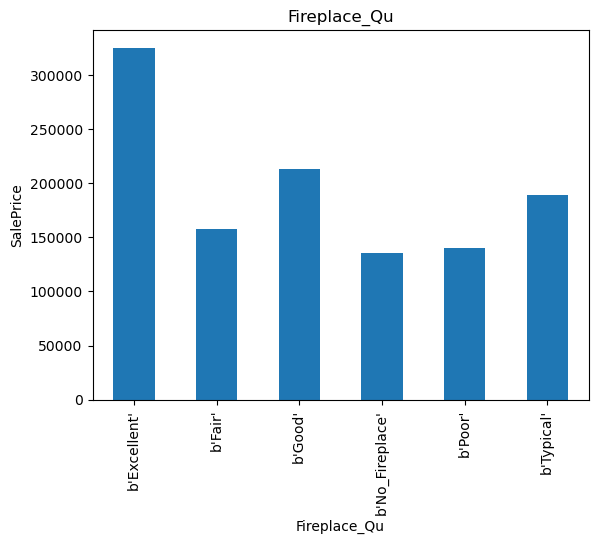

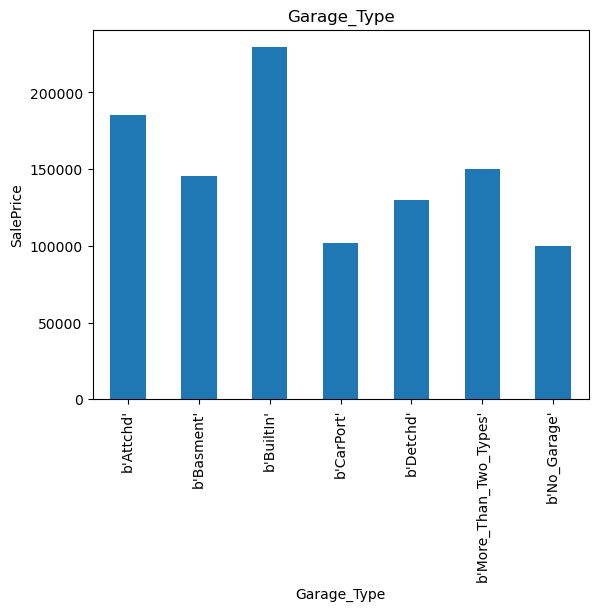

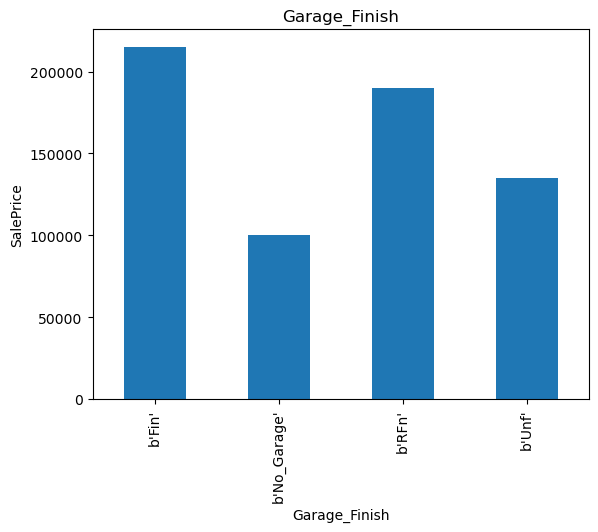

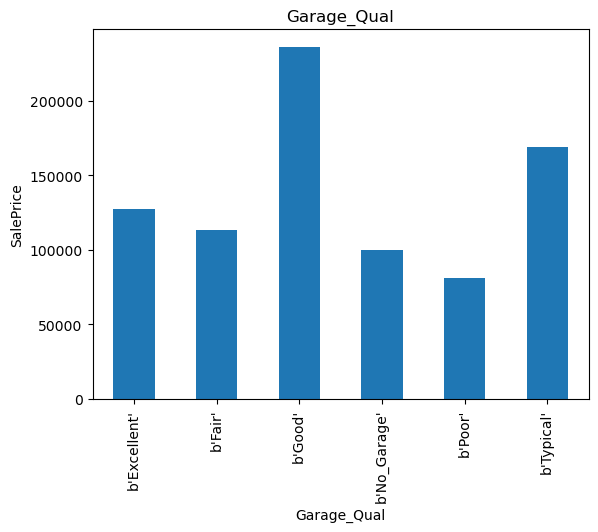

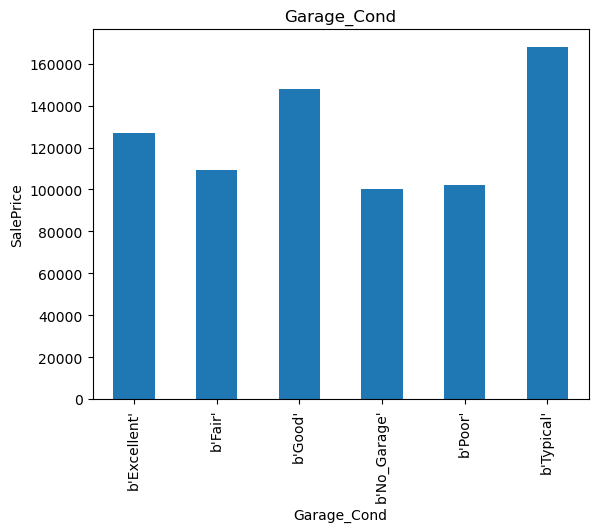

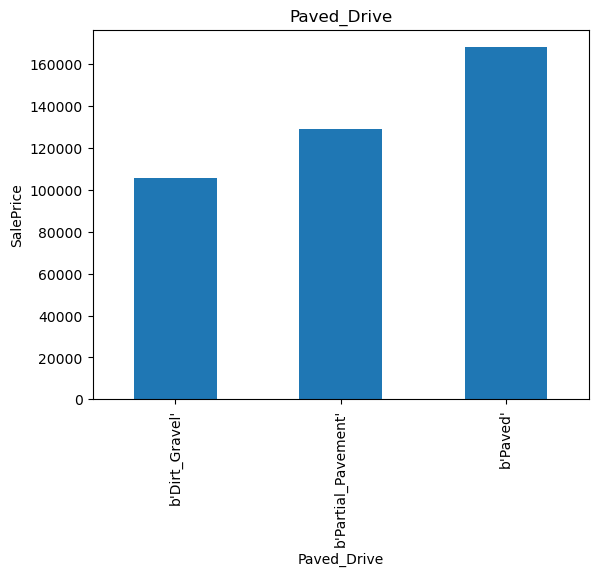

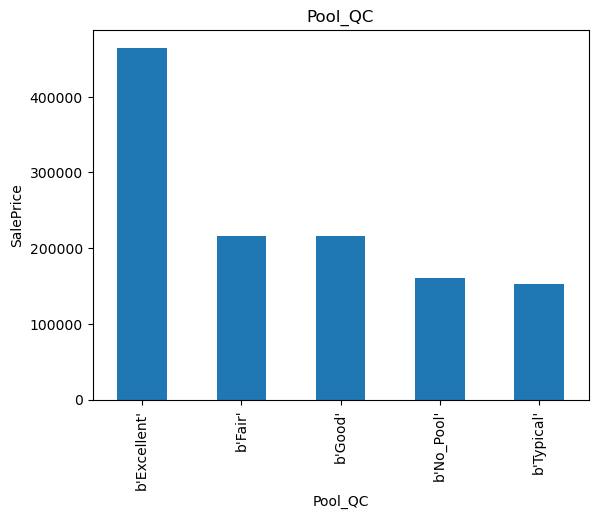

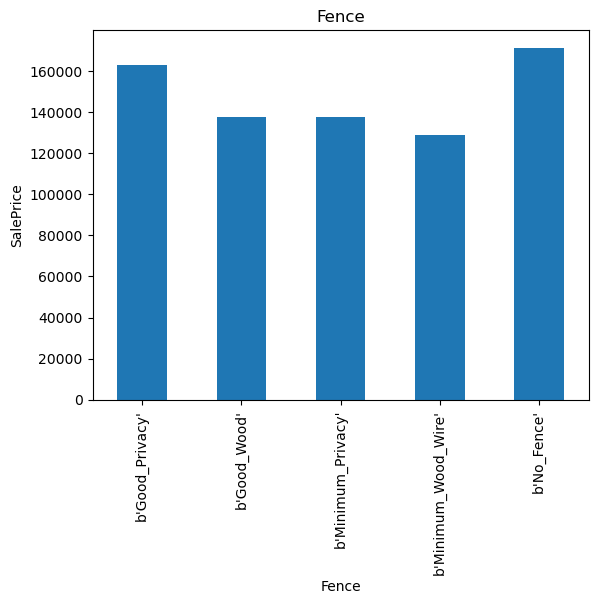

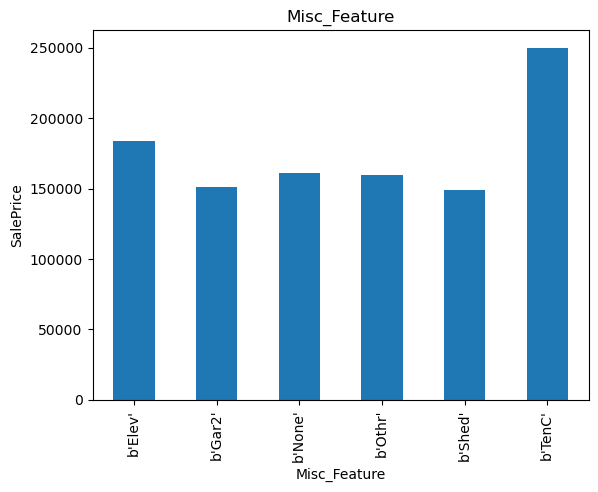

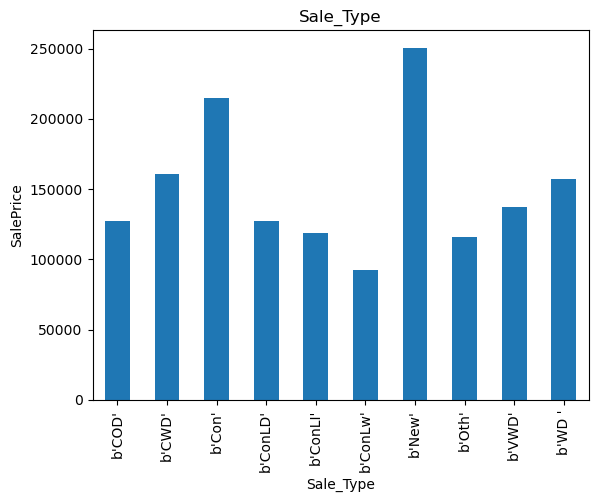

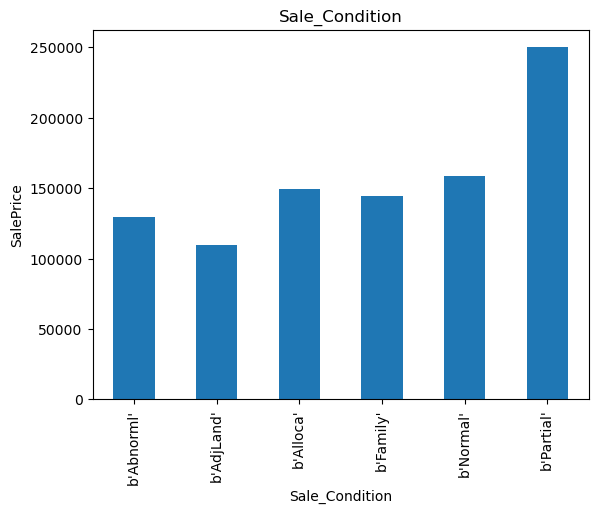

In [428]:
for feature in categorical_features:
    data=df_data.copy()
    data.groupby(feature)['Sale_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [ ]:
#=======FEATURE ENGENEERING========#

In [450]:
## Temporal Variables (Date Time Variables)

for feature in ["Year_Built","Year_Remod_Add"]:
       
    df_data[feature]=df_data['Year_Sold']-df_data[feature]

df_data.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',141.0,31770.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'None',0.0,5.0,2010.0,b'WD ',b'Normal',215000.0,-93.619754,42.054035
1,b'One_Story_1946_and_Newer_All_Styles',b'Residential_High_Density',80.0,11622.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,b'Minimum_Privacy',b'None',0.0,6.0,2010.0,b'WD ',b'Normal',105000.0,-93.619756,42.053014
2,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',81.0,14267.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'Gar2',12500.0,6.0,2010.0,b'WD ',b'Normal',172000.0,-93.619387,42.052659
3,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',93.0,11160.0,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'None',0.0,4.0,2010.0,b'WD ',b'Normal',244000.0,-93.617320,42.051245
4,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',74.0,13830.0,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Inside',...,b'Minimum_Privacy',b'None',0.0,3.0,2010.0,b'WD ',b'Normal',189900.0,-93.638933,42.060899


In [447]:
df_data[["Year_Built","Year_Remod_Add"]].head()

,Year_Built,Year_Remod_Add
0,50.0,50.0
1,49.0,49.0
2,52.0,52.0
3,42.0,42.0
4,13.0,12.0


In [451]:
import numpy as np

num_features=['Lot_Frontage', 'Lot_Area', 'First_Flr_SF', 'Gr_Liv_Area', 'Sale_Price']

for feature in num_features:
    df_data[feature]=np.log(df_data[feature])

df_data.head()

E:\Program Files\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',4.948760,10.366278,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'None',0.0,5.0,2010.0,b'WD ',b'Normal',12.278393,-93.619754,42.054035
1,b'One_Story_1946_and_Newer_All_Styles',b'Residential_High_Density',4.382027,9.360655,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Inside',...,b'Minimum_Privacy',b'None',0.0,6.0,2010.0,b'WD ',b'Normal',11.561716,-93.619756,42.053014
2,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',4.394449,9.565704,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'Gar2',12500.0,6.0,2010.0,b'WD ',b'Normal',12.055250,-93.619387,42.052659
3,b'One_Story_1946_and_Newer_All_Styles',b'Residential_Low_Density',4.532599,9.320091,b'Pave',b'No_Alley_Access',b'Regular',b'Lvl',b'AllPub',b'Corner',...,b'No_Fence',b'None',0.0,4.0,2010.0,b'WD ',b'Normal',12.404924,-93.617320,42.051245
4,b'Two_Story_1946_and_Newer',b'Residential_Low_Density',4.304065,9.534595,b'Pave',b'No_Alley_Access',b'Slightly_Irregular',b'Lvl',b'AllPub',b'Inside',...,b'Minimum_Privacy',b'None',0.0,3.0,2010.0,b'WD ',b'Normal',12.154253,-93.638933,42.060899


In [452]:
categorical_features=[feature for feature in df_data.columns if df_data[feature].dtype=='O']
categorical_features

['MS_SubClass',
 'MS_Zoning',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_Type_2',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'Kitchen_Qual',
 'Functional',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Qual',
 'Garage_Cond',
 'Paved_Drive',
 'Pool_QC',
 'Fence',
 'Misc_Feature',
 'Sale_Type',
 'Sale_Condition']

In [460]:
for feature in categorical_features:
    temp=df_data.groupby(feature)['Sale_Price'].count()/len(df_data)
    temp_df=temp[temp>0.01].index
    df_data[feature]=np.where(df_data[feature].isin(temp_df),df_data[feature],'Rare_var')
    
df_data

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,9,2,4.948760,10.366278,1,1,1,1,1,1,...,4,2,0.0,5.0,2010.0,2,3,12.278393,-93.619754,42.054035
1,9,0,4.382027,9.360655,1,1,0,1,1,0,...,2,2,0.0,6.0,2010.0,2,3,11.561716,-93.619756,42.053014
2,9,2,4.394449,9.565704,1,1,1,1,1,1,...,4,Rare_var,12500.0,6.0,2010.0,2,3,12.055250,-93.619387,42.052659
3,9,2,4.532599,9.320091,1,1,0,1,1,1,...,4,2,0.0,4.0,2010.0,2,3,12.404924,-93.617320,42.051245
4,11,2,4.304065,9.534595,1,1,1,1,1,0,...,2,2,0.0,3.0,2010.0,2,3,12.154253,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,8,2,3.610918,8.979291,1,1,1,1,1,4,...,3,2,0.0,3.0,2006.0,2,3,11.867097,-93.604776,41.988964
2926,9,2,-inf,9.092120,1,1,1,2,1,0,...,2,2,0.0,6.0,2006.0,2,3,11.782953,-93.602680,41.988314
2927,6,2,4.127134,9.253496,1,1,0,1,1,0,...,2,0,700.0,7.0,2006.0,2,3,11.790557,-93.606847,41.986510
2928,9,2,4.343805,9.211340,1,1,0,1,1,0,...,4,2,0.0,4.0,2006.0,2,3,12.043554,-93.600190,41.990921


In [461]:
for feature in categorical_features:
    labels_ordered=df_data.groupby([feature])['Sale_Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df_data[feature]=df_data[feature].map(labels_ordered)
    
df_data.head(10)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,9,2,4.948760,10.366278,1,1,1,1,1,1,...,4,2,0.0,5.0,2010.0,2,3,12.278393,-93.619754,42.054035
1,9,0,4.382027,9.360655,1,1,0,1,1,0,...,2,2,0.0,6.0,2010.0,2,3,11.561716,-93.619756,42.053014
2,9,2,4.394449,9.565704,1,1,1,1,1,1,...,4,1,12500.0,6.0,2010.0,2,3,12.055250,-93.619387,42.052659
3,9,2,4.532599,9.320091,1,1,0,1,1,1,...,4,2,0.0,4.0,2010.0,2,3,12.404924,-93.617320,42.051245
4,11,2,4.304065,9.534595,1,1,1,1,1,0,...,2,2,0.0,3.0,2010.0,2,3,12.154253,-93.638933,42.060899
5,11,2,4.356709,9.208138,1,1,1,1,1,0,...,4,2,0.0,6.0,2010.0,2,3,12.183316,-93.638925,42.060779
6,10,2,3.713572,8.501064,1,1,0,1,1,0,...,4,2,0.0,4.0,2010.0,2,3,12.271392,-93.633792,42.062978
7,10,2,3.761200,8.518193,1,1,1,3,1,0,...,4,2,0.0,1.0,2010.0,2,3,12.162643,-93.633826,42.060728
8,10,2,3.663562,8.592115,1,1,1,1,1,0,...,4,2,0.0,3.0,2010.0,2,3,12.373703,-93.632852,42.061120
9,11,2,4.094345,8.922658,1,1,0,1,1,0,...,4,2,0.0,6.0,2010.0,2,3,12.149502,-93.639068,42.059193


In [462]:
scaling_feature=[feature for feature in df_data.columns if feature not in ['Sale_Price'] ]
len(scaling_feature)

80

In [463]:
scaling_feature

['MS_SubClass',
 'MS_Zoning',
 'Lot_Frontage',
 'Lot_Area',
 'Street',
 'Alley',
 'Lot_Shape',
 'Land_Contour',
 'Utilities',
 'Lot_Config',
 'Land_Slope',
 'Neighborhood',
 'Condition_1',
 'Condition_2',
 'Bldg_Type',
 'House_Style',
 'Overall_Qual',
 'Overall_Cond',
 'Year_Built',
 'Year_Remod_Add',
 'Roof_Style',
 'Roof_Matl',
 'Exterior_1st',
 'Exterior_2nd',
 'Mas_Vnr_Type',
 'Mas_Vnr_Area',
 'Exter_Qual',
 'Exter_Cond',
 'Foundation',
 'Bsmt_Qual',
 'Bsmt_Cond',
 'Bsmt_Exposure',
 'BsmtFin_Type_1',
 'BsmtFin_SF_1',
 'BsmtFin_Type_2',
 'BsmtFin_SF_2',
 'Bsmt_Unf_SF',
 'Total_Bsmt_SF',
 'Heating',
 'Heating_QC',
 'Central_Air',
 'Electrical',
 'First_Flr_SF',
 'Second_Flr_SF',
 'Low_Qual_Fin_SF',
 'Gr_Liv_Area',
 'Bsmt_Full_Bath',
 'Bsmt_Half_Bath',
 'Full_Bath',
 'Half_Bath',
 'Bedroom_AbvGr',
 'Kitchen_AbvGr',
 'Kitchen_Qual',
 'TotRms_AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace_Qu',
 'Garage_Type',
 'Garage_Finish',
 'Garage_Cars',
 'Garage_Area',
 'Garage_Qual',
 'Garage

In [ ]:
#==============# Feature Scaling #===================#

In [514]:
np.isinf(df_data).any()

MS_SubClass       False
MS_Zoning         False
Lot_Area          False
Street            False
Alley             False
                  ...  
Sale_Type         False
Sale_Condition    False
Sale_Price        False
Longitude         False
Latitude          False
Length: 80, dtype: bool

In [513]:
np.isinf(df_data["Lot_Frontage"]).any
df_data = df_data.drop(["Lot_Frontage"], axis=1)

In [505]:
df_data["Lot_Frontage"][2926] 

4.0

In [504]:
df_data["Lot_Frontage"][2926] = 4

C:\Users\Tiago Meireles\AppData\Local\Temp\ipykernel_17652\2913128167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data["Lot_Frontage"][2926] = 4


In [484]:
np.isnan(df_data).any().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [515]:
feature_scale=[feature for feature in df_data.columns if feature not in ['Sale_Price']]
print(feature_scale)
from sklearn.preprocessing import MinMaxScaler
               
scaler=MinMaxScaler()
scaler.fit(df_data[feature_scale])
scaler.transform(df_data[feature_scale])

['MS_SubClass', 'MS_Zoning', 'Lot_Area', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Area', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Thr

array([[8.18181818e-01, 6.66666667e-01, 6.25543170e-01, ...,
        7.50000000e-01, 6.34248138e-01, 8.78358694e-01],
       [8.18181818e-01, 0.00000000e+00, 4.28725519e-01, ...,
        7.50000000e-01, 6.34230856e-01, 8.65079984e-01],
       [8.18181818e-01, 6.66666667e-01, 4.68857201e-01, ...,
        7.50000000e-01, 6.37419422e-01, 8.60462999e-01],
       ...,
       [5.45454545e-01, 6.66666667e-01, 4.07752562e-01, ...,
        7.50000000e-01, 7.45778822e-01, 1.56067109e-04],
       [8.18181818e-01, 6.66666667e-01, 3.99501952e-01, ...,
        7.50000000e-01, 8.03302629e-01, 5.75237352e-02],
       [1.00000000e+00, 6.66666667e-01, 3.91866448e-01, ...,
        7.50000000e-01, 8.04979002e-01, 3.59864742e-02]])

In [518]:
df_data = pd.concat([df_data['Sale_Price'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [519]:
df_data

,Sale_Price,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
0,12.278393,0.818182,0.666667,0.625543,1.0,0.5,0.333333,0.333333,1.0,0.25,...,0.0,1.00,1.0,0.000000,0.363636,1.0,0.666667,0.75,0.634248,0.878359
1,11.561716,0.818182,0.000000,0.428726,1.0,0.5,0.000000,0.333333,1.0,0.00,...,0.0,0.50,1.0,0.000000,0.454545,1.0,0.666667,0.75,0.634231,0.865080
2,12.055250,0.818182,0.666667,0.468857,1.0,0.5,0.333333,0.333333,1.0,0.25,...,0.0,1.00,0.5,0.735294,0.454545,1.0,0.666667,0.75,0.637419,0.860463
3,12.404924,0.818182,0.666667,0.420786,1.0,0.5,0.000000,0.333333,1.0,0.25,...,0.0,1.00,1.0,0.000000,0.272727,1.0,0.666667,0.75,0.655281,0.842073
4,12.154253,1.000000,0.666667,0.462769,1.0,0.5,0.333333,0.333333,1.0,0.00,...,0.0,0.50,1.0,0.000000,0.181818,1.0,0.666667,0.75,0.468520,0.967629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,11.867097,0.727273,0.666667,0.354086,1.0,0.5,0.333333,0.333333,1.0,1.00,...,0.0,0.75,1.0,0.000000,0.181818,0.0,0.666667,0.75,0.763675,0.032072
2926,11.782953,0.818182,0.666667,0.376169,1.0,0.5,0.333333,0.666667,1.0,0.00,...,0.0,0.50,1.0,0.000000,0.454545,0.0,0.666667,0.75,0.781786,0.023618
2927,11.790557,0.545455,0.666667,0.407753,1.0,0.5,0.000000,0.333333,1.0,0.00,...,0.0,0.50,0.0,0.041176,0.545455,0.0,0.666667,0.75,0.745779,0.000156
2928,12.043554,0.818182,0.666667,0.399502,1.0,0.5,0.000000,0.333333,1.0,0.00,...,0.0,1.00,1.0,0.000000,0.272727,0.0,0.666667,0.75,0.803303,0.057524


In [122]:
#print (str_df['DESCR'])

In [332]:
df_weka.head()
df_data['Sale_Price'] = df_data['Sale_Price'].fillna(
  df_data['Sale_Price'].mean())

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
new_data = df_data
new_data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
predictors = ['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'Garage_Area',
       'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch',
       'Pool_Area', 'Pool_QC', 'Fence', 'Misc_Feature', 'Misc_Val', 'Mo_Sold',
       'Year_Sold', 'Sale_Type', 'Sale_Condition', 'Longitude',
       'Latitude']
target =  'Sale_Price'

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz


In [334]:
new_data.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'G

In [335]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MS_SubClass', 'MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type', 'House_Style', 'Overall_Qual', 'Overall_Cond', 'Roof_Style', 'Roof_Matl', 'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure', 'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC', 'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional', 'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual', 'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature', 'Sale_Type', 'Sale_Condition']
No. of. categorical features:  46


In [336]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_data[object_cols]))
OH_cols.index = new_data.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_data.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

E:\Program Files\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [337]:
df_final

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,x44_b'New',x44_b'Oth',x44_b'VWD',x44_b'WD ',x45_b'Abnorml',x45_b'AdjLand',x45_b'Alloca',x45_b'Family',x45_b'Normal',x45_b'Partial'
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,0.0,3.0,0.0,184.0,1003.0,1003.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2926,0.0,8885.0,1983.0,1983.0,0.0,2.0,324.0,239.0,864.0,902.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,62.0,10441.0,1992.0,1992.0,0.0,3.0,0.0,575.0,912.0,970.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2928,77.0,10010.0,1974.0,1975.0,0.0,1.0,123.0,195.0,1389.0,1389.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [338]:
new_data = df_final

In [231]:
labelencoder=LabelEncoder()
for column in df_data.columns:
    df_data[column] = labelencoder.fit_transform(df_data[column])

In [340]:
new_data.describe()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,x44_b'New',x44_b'Oth',x44_b'VWD',x44_b'WD ',x45_b'Abnorml',x45_b'AdjLand',x45_b'Alloca',x45_b'Family',x45_b'Normal',x45_b'Partial'
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.647782,10147.921843,1971.356314,1984.266553,101.096928,4.177474,49.705461,559.071672,1051.255631,1159.557679,...,0.081570,0.002389,0.000341,0.865529,0.064846,0.004096,0.008191,0.015700,0.823549,0.083618
std,33.499441,7880.017759,30.245361,20.860286,178.634545,2.233372,169.142089,439.540571,440.968018,391.890885,...,0.273755,0.048828,0.018474,0.341216,0.246297,0.063876,0.090149,0.124332,0.381268,0.276861
min,0.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,7440.250000,1954.000000,1965.000000,0.000000,3.000000,0.000000,219.000000,793.000000,876.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,63.000000,9436.500000,1973.000000,1993.000000,0.000000,3.000000,0.000000,465.500000,990.000000,1084.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,78.000000,11555.250000,2001.000000,2004.000000,162.750000,7.000000,0.000000,801.750000,1301.500000,1384.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,7.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [199]:
new_data = df_data

In [287]:
new_data

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,x44_b'New',x44_b'Oth',x44_b'VWD',x44_b'WD ',x45_b'Abnorml',x45_b'AdjLand',x45_b'Alloca',x45_b'Family',x45_b'Normal',x45_b'Partial'
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,0.0,3.0,0.0,184.0,1003.0,1003.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2926,0.0,8885.0,1983.0,1983.0,0.0,2.0,324.0,239.0,864.0,902.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,62.0,10441.0,1992.0,1992.0,0.0,3.0,0.0,575.0,912.0,970.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2928,77.0,10010.0,1974.0,1975.0,0.0,1.0,123.0,195.0,1389.0,1389.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
#del(price)
#del(prices)
#del(weka)
#del(dfPearson)

In [ ]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [373]:
dfPearson = pd.get_dummies(df_data)

In [374]:
dfPearson

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_b'New',Sale_Type_b'Oth',Sale_Type_b'VWD',Sale_Type_b'WD ',Sale_Condition_b'Abnorml',Sale_Condition_b'AdjLand',Sale_Condition_b'Alloca',Sale_Condition_b'Family',Sale_Condition_b'Normal',Sale_Condition_b'Partial'
0,141.0,31770.0,1960.0,1960.0,112.0,2.0,0.0,441.0,1080.0,1656.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,11622.0,1961.0,1961.0,0.0,6.0,144.0,270.0,882.0,896.0,...,0,0,0,1,0,0,0,0,1,0
2,81.0,14267.0,1958.0,1958.0,108.0,1.0,0.0,406.0,1329.0,1329.0,...,0,0,0,1,0,0,0,0,1,0
3,93.0,11160.0,1968.0,1968.0,0.0,1.0,0.0,1045.0,2110.0,2110.0,...,0,0,0,1,0,0,0,0,1,0
4,74.0,13830.0,1997.0,1998.0,0.0,3.0,0.0,137.0,928.0,928.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,0.0,3.0,0.0,184.0,1003.0,1003.0,...,0,0,0,1,0,0,0,0,1,0
2926,0.0,8885.0,1983.0,1983.0,0.0,2.0,324.0,239.0,864.0,902.0,...,0,0,0,1,0,0,0,0,1,0
2927,62.0,10441.0,1992.0,1992.0,0.0,3.0,0.0,575.0,912.0,970.0,...,0,0,0,1,0,0,0,0,1,0
2928,77.0,10010.0,1974.0,1975.0,0.0,1.0,123.0,195.0,1389.0,1389.0,...,0,0,0,1,0,0,0,0,1,0


In [375]:
new_data = dfPearson

In [262]:
dfPearson = new_data

In [376]:

#dfPearson = pd.get_dummies(df_data)

prices = dfPearson.corr() 
prices.head()
price = prices["Sale_Price"]
price = pd.DataFrame(price).T

#size = len(price.columns)
#price
#df_data.head()
#del(price)
#print(len(price.columns))
#print(price.columns[3].index)
#print(price[price.columns[3]])

In [379]:
prices

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_b'New',Sale_Type_b'Oth',Sale_Type_b'VWD',Sale_Type_b'WD ',Sale_Condition_b'Abnorml',Sale_Condition_b'AdjLand',Sale_Condition_b'Alloca',Sale_Condition_b'Family',Sale_Condition_b'Normal',Sale_Condition_b'Partial'
Lot_Frontage,1.000000,0.136862,0.026130,0.069509,0.109858,0.066707,-0.005254,0.139290,0.206080,0.241707,...,0.166197,0.000097,0.015089,-0.136702,0.018493,-0.007463,0.012826,0.019772,-0.140954,0.166324
Lot_Area,0.136862,1.000000,0.023258,0.021682,0.125950,-0.045760,0.083198,0.023883,0.253765,0.332235,...,0.032328,-0.003937,0.008495,-0.015027,-0.014079,-0.020244,0.024450,0.018232,-0.024052,0.034169
Year_Built,0.026130,0.023258,1.000000,0.612095,0.306797,-0.179373,-0.027328,0.129311,0.407764,0.310463,...,0.343270,-0.013985,-0.008161,-0.203243,-0.120844,-0.077805,-0.025238,-0.036261,-0.137162,0.338843
Year_Remod_Add,0.069509,0.021682,0.612095,1.000000,0.191740,-0.050840,-0.061934,0.165397,0.298393,0.242108,...,0.325432,-0.027105,0.012167,-0.156367,-0.146235,-0.078199,-0.034022,-0.049793,-0.102775,0.323105
Mas_Vnr_Area,0.109858,0.125950,0.306797,0.191740,1.000000,-0.107222,-0.014955,0.089662,0.393530,0.392280,...,0.148301,-0.022064,0.024716,-0.093210,-0.040828,-0.018197,-0.019554,-0.017162,-0.065964,0.145432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sale_Condition_b'AdjLand',-0.007463,-0.020244,-0.077805,-0.078199,-0.018197,0.033194,-0.018848,-0.006382,-0.042691,-0.028528,...,-0.019111,-0.003138,-0.001185,0.025277,-0.016887,1.000000,-0.005828,-0.008099,-0.138542,-0.019371
Sale_Condition_b'Alloca',0.012826,0.024450,-0.025238,-0.034022,-0.019554,-0.005527,-0.026711,-0.060993,-0.044343,0.041764,...,-0.027083,-0.004447,-0.001679,0.035820,-0.023931,-0.005828,1.000000,-0.011477,-0.196332,-0.027452
Sale_Condition_b'Family',0.019772,0.018232,-0.036261,-0.049793,-0.017162,0.051439,-0.002085,0.024475,-0.003753,-0.000432,...,-0.037638,0.050057,-0.002334,-0.014601,-0.033257,-0.008099,-0.011477,1.000000,-0.272844,-0.038150
Sale_Condition_b'Normal',-0.140954,-0.024052,-0.137162,-0.102775,-0.065964,-0.097930,0.069230,-0.150107,-0.139299,-0.141705,...,-0.643836,-0.087383,0.008553,0.620601,-0.568899,-0.138542,-0.196332,-0.272844,1.000000,-0.652596


In [380]:



#newprice = price
#newprice
#print(price.keys)
#price.drop(price[0,2])
price.columns


i=0
cont=0
while i < (len(price.columns)):
    #print("{"+str(price.values[0,i])+"}")
    #print(price.columns[i])
    #print(i)
    #print(price.values[0,i] < (0.000000))
    price.values[0,i]
    cont += 1
    if cont > 1000:
        print(cont)
        break
    elif price.values[0,i] < (0.200):
        price.drop(price.columns[i],inplace=True,axis=1)
        new_data.drop(new_data.columns[i],inplace=True,axis=1)
        #old_data.drop(old_data.columns[i],inplace=True,axis=1)
        #i += 1
    elif i+1 > len(price.columns):
        i += 0
    else :
        i += 1
        


In [381]:
len(price.columns)
#print(newprice)
#price
new_data

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Bsmt_Full_Bath,...,Fireplace_Qu_b'Excellent',Fireplace_Qu_b'Good',Garage_Type_b'Attchd',Garage_Type_b'BuiltIn',Garage_Finish_b'Fin',Garage_Qual_b'Typical',Garage_Cond_b'Typical',Paved_Drive_b'Paved',Sale_Type_b'New',Sale_Condition_b'Partial'
0,141.0,31770.0,1960.0,1960.0,112.0,1080.0,1656.0,0.0,1656.0,1.0,...,0,1,1,0,1,1,1,0,0,0
1,80.0,11622.0,1961.0,1961.0,0.0,882.0,896.0,0.0,896.0,0.0,...,0,0,1,0,0,1,1,1,0,0
2,81.0,14267.0,1958.0,1958.0,108.0,1329.0,1329.0,0.0,1329.0,0.0,...,0,0,1,0,0,1,1,1,0,0
3,93.0,11160.0,1968.0,1968.0,0.0,2110.0,2110.0,0.0,2110.0,1.0,...,0,0,1,0,1,1,1,1,0,0
4,74.0,13830.0,1997.0,1998.0,0.0,928.0,928.0,701.0,1629.0,0.0,...,0,0,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937.0,1984.0,1984.0,0.0,1003.0,1003.0,0.0,1003.0,1.0,...,0,0,0,0,0,1,1,1,0,0
2926,0.0,8885.0,1983.0,1983.0,0.0,864.0,902.0,0.0,902.0,1.0,...,0,0,1,0,0,1,1,1,0,0
2927,62.0,10441.0,1992.0,1992.0,0.0,912.0,970.0,0.0,970.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2928,77.0,10010.0,1974.0,1975.0,0.0,1389.0,1389.0,0.0,1389.0,1.0,...,0,0,1,0,0,1,1,1,0,0


In [16]:
old_data

NameError: name 'old_data' is not defined

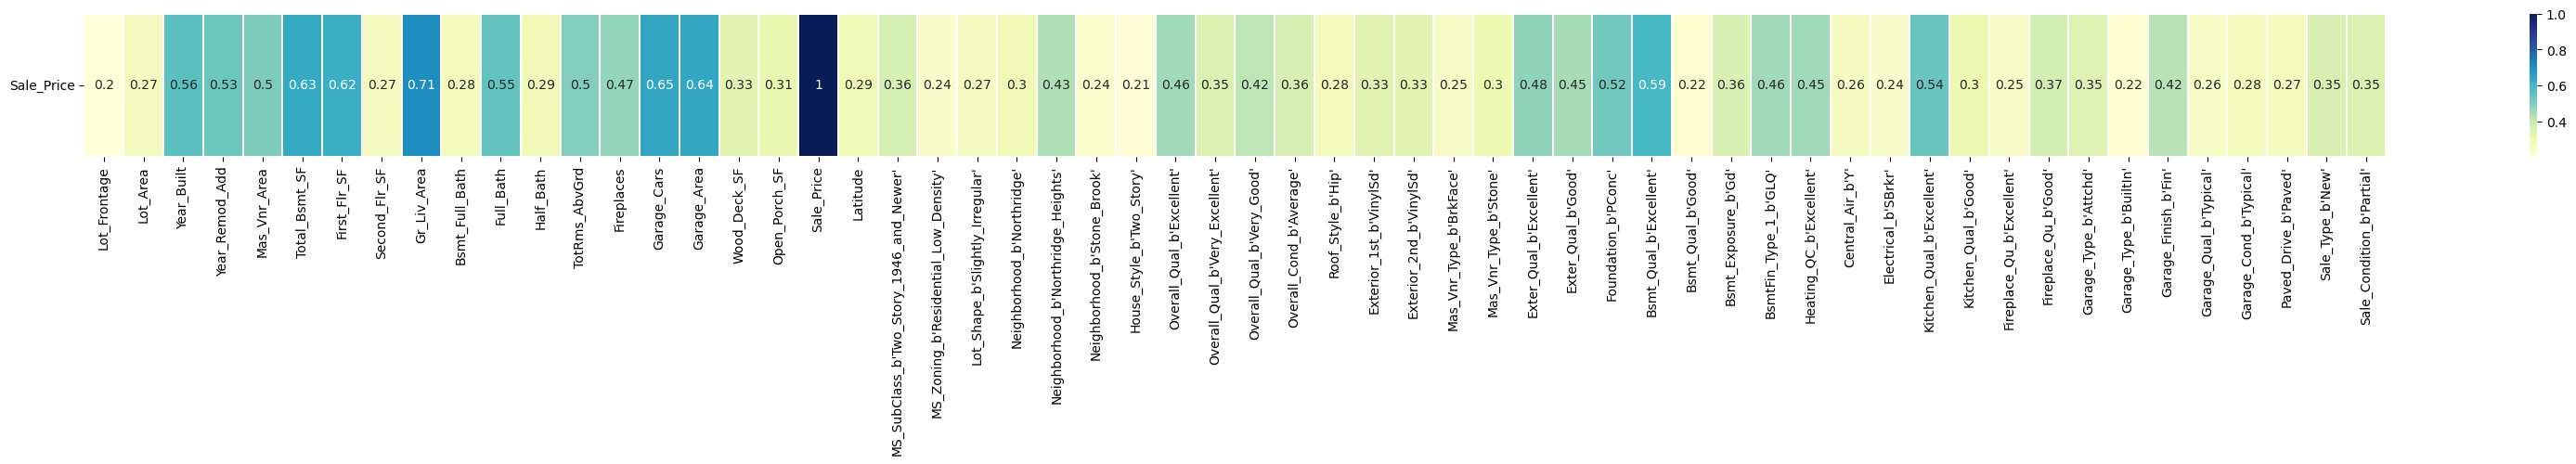

In [315]:
plt.figure(figsize=(40,2))
#dfDummies = pd.get_dummies(price)
#prices = dfDummies.corr(method='pearson') 
#prices = dfDummies.pivot('Year_Sold',target,'Sale_Price')
#ax = sns.heatmap(price,cmap='YlGnBu')
sns.heatmap(price,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

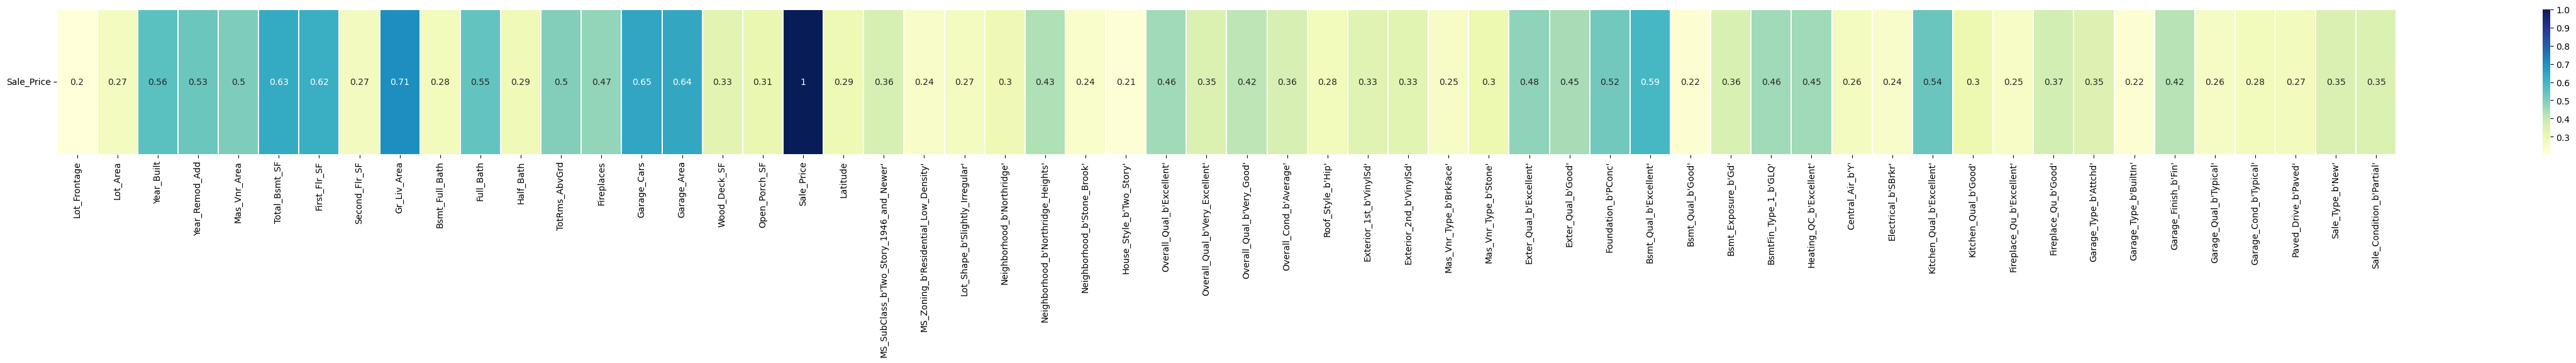

In [382]:
plt.figure(figsize=(60,3))
#dfDummies = pd.get_dummies(price)
#prices = dfDummies.corr(method='pearson') 
#prices = dfDummies.pivot('Year_Sold',target,'Sale_Price')
#ax = sns.heatmap(price,cmap='YlGnBu')
sns.heatmap(price,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [573]:
df_data = df_data*10
df_data

,Sale_Price,MS_SubClass,MS_Zoning,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Longitude,Latitude
0,122.783933,8.181818,6.666667,6.255432,10.0,5.0,3.333333,3.333333,10.0,2.5,...,0.0,10.0,10.0,0.000000,3.636364,10.0,6.666667,7.5,6.342481,8.783587
1,115.617156,8.181818,0.000000,4.287255,10.0,5.0,0.000000,3.333333,10.0,0.0,...,0.0,5.0,10.0,0.000000,4.545455,10.0,6.666667,7.5,6.342309,8.650800
2,120.552498,8.181818,6.666667,4.688572,10.0,5.0,3.333333,3.333333,10.0,2.5,...,0.0,10.0,5.0,7.352941,4.545455,10.0,6.666667,7.5,6.374194,8.604630
3,124.049235,8.181818,6.666667,4.207865,10.0,5.0,0.000000,3.333333,10.0,2.5,...,0.0,10.0,10.0,0.000000,2.727273,10.0,6.666667,7.5,6.552806,8.420731
4,121.542529,10.000000,6.666667,4.627686,10.0,5.0,3.333333,3.333333,10.0,0.0,...,0.0,5.0,10.0,0.000000,1.818182,10.0,6.666667,7.5,4.685205,9.676291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,118.670973,7.272727,6.666667,3.540859,10.0,5.0,3.333333,3.333333,10.0,10.0,...,0.0,7.5,10.0,0.000000,1.818182,0.0,6.666667,7.5,7.636745,0.320718
2926,117.829526,8.181818,6.666667,3.761685,10.0,5.0,3.333333,6.666667,10.0,0.0,...,0.0,5.0,10.0,0.000000,4.545455,0.0,6.666667,7.5,7.817863,0.236182
2927,117.905572,5.454545,6.666667,4.077526,10.0,5.0,0.000000,3.333333,10.0,0.0,...,0.0,5.0,0.0,0.411765,5.454545,0.0,6.666667,7.5,7.457788,0.001561
2928,120.435537,8.181818,6.666667,3.995020,10.0,5.0,0.000000,3.333333,10.0,0.0,...,0.0,10.0,10.0,0.000000,2.727273,0.0,6.666667,7.5,8.033026,0.575237


In [574]:
# data preparation
# convert to float to have precise and homogenoues computation
#dataset = new_data.astype(float)
#print("dataset shape", dataset.shape)
dataset = df_data.astype(int)
#remove categories with low corr from the main dataframe



# get features by removing id and class
# remove id
X = dataset.iloc[:,0:]
X = X.drop(["Sale_Price"],axis=1)
print("X shape", X.shape)

# get class label
y = dataset["Sale_Price"]
#y = dataset.loc[:,0]
print("y shape", y.shape)

X shape (2930, 79)
y shape (2930,)


In [575]:
dataset
print(X.head())
print(y.head())

   MS_SubClass  MS_Zoning  Lot_Area  Street  Alley  Lot_Shape  Land_Contour  \
0            8          6         6      10      5          3             3   
1            8          0         4      10      5          0             3   
2            8          6         4      10      5          3             3   
3            8          6         4      10      5          0             3   
4           10          6         4      10      5          3             3   

   Utilities  Lot_Config  Land_Slope  ...  Pool_QC  Fence  Misc_Feature  \
0         10           2           0  ...        0     10            10   
1         10           0           0  ...        0      5            10   
2         10           2           0  ...        0     10             5   
3         10           2           0  ...        0     10            10   
4         10           0           0  ...        0      5            10   

   Misc_Val  Mo_Sold  Year_Sold  Sale_Type  Sale_Condition  Longitude  \
0

In [576]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=4)

print (X_train.shape, X_test.shape)

(2344, 79) (586, 79)


k:  1 | Accuracy 0.213


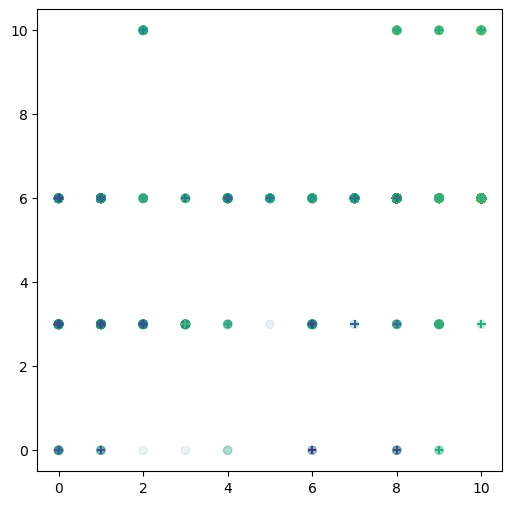

In [577]:


kNN = KNeighborsClassifier(n_neighbors=100)    
kNN.fit( X_train, y_train )
y_pred = kNN.predict( X_test )

# compute accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )    
    
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c=y_train, alpha=0.1)
ax.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_pred, marker='+');

Accuracy 0.25939
Accuracy 0.21331
Accuracy 0.23208
Accuracy 0.24573
Accuracy 0.23038
Accuracy 0.23208
Accuracy 0.24403
Accuracy 0.23549
Accuracy 0.24915
Accuracy 0.24573
Accuracy 0.25768
Accuracy 0.25427
Accuracy 0.25427
Accuracy 0.24744
Accuracy 0.24744
Accuracy 0.24061
Accuracy 0.23208
Accuracy 0.24232
Accuracy 0.23549
Min Accuracy: 0.21331 | Max Accuracy 0.25939 | Avg Accuracy 0.24292


Text(0, 0.5, 'Sale_Price')

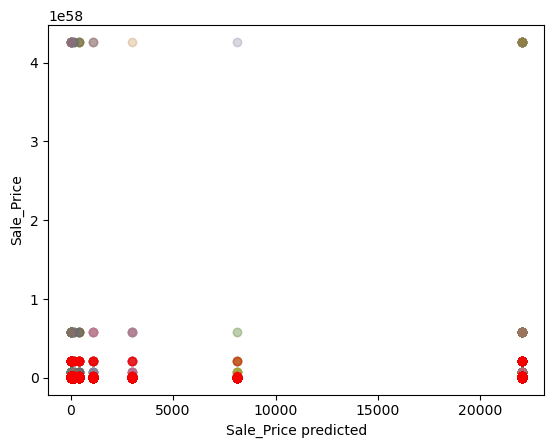

In [578]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the classifier
for i in range(1,20):
    kNN = KNeighborsClassifier(n_neighbors=i)
    
    # Train the classifier
    kNN.fit(X_train,y_train)

    # Generate predictions
    y_pred = kNN.predict(X_test)

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if i <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print (f"Accuracy {acc:.5f}")

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(i+1)) )


import matplotlib.pyplot as plt

fig, axs = plt.subplots()
axs.plot(np.exp(X_train), np.exp(y_train), 'o', alpha=0.1)
axs.plot(np.exp(X_test), np.exp(y_test), 'o', alpha=0.1, c="red")
#axs.axline((0,0), slope = 1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

In [531]:
for f in X.columns:
    print ("Feature {:20} -> Scale: {:7.2f}".format(f, X.loc[:,f].max() - X.loc[:,f].min()) )

Feature MS_SubClass          -> Scale:    1.00
Feature MS_Zoning            -> Scale:    1.00
Feature Lot_Area             -> Scale:    1.00
Feature Street               -> Scale:    1.00
Feature Alley                -> Scale:    1.00
Feature Lot_Shape            -> Scale:    1.00
Feature Land_Contour         -> Scale:    1.00
Feature Utilities            -> Scale:    1.00
Feature Lot_Config           -> Scale:    1.00
Feature Land_Slope           -> Scale:    1.00
Feature Neighborhood         -> Scale:    1.00
Feature Condition_1          -> Scale:    1.00
Feature Condition_2          -> Scale:    1.00
Feature Bldg_Type            -> Scale:    1.00
Feature House_Style          -> Scale:    1.00
Feature Overall_Qual         -> Scale:    1.00
Feature Overall_Cond         -> Scale:    1.00
Feature Year_Built           -> Scale:    1.00
Feature Year_Remod_Add       -> Scale:    1.00
Feature Roof_Style           -> Scale:    1.00
Feature Roof_Matl            -> Scale:    1.00
Feature Exter

k:  1 | Accuracy 0.25768
k:  2 | Accuracy 0.21502
k:  3 | Accuracy 0.23038
k:  4 | Accuracy 0.24232
k:  5 | Accuracy 0.23038
k:  6 | Accuracy 0.23208
k:  7 | Accuracy 0.24061
k:  8 | Accuracy 0.23891
k:  9 | Accuracy 0.24061
k: 10 | Accuracy 0.24915
k: 11 | Accuracy 0.24915
k: 12 | Accuracy 0.24744
k: 13 | Accuracy 0.24915
k: 14 | Accuracy 0.24573
k: 15 | Accuracy 0.25768
k: 16 | Accuracy 0.24403
k: 17 | Accuracy 0.23379
k: 18 | Accuracy 0.25427
k: 19 | Accuracy 0.25427
k: 20 | Accuracy 0.25256
Min Accuracy: 0.21502 | Max Accuracy 0.25768 | Avg Accuracy 0.24395


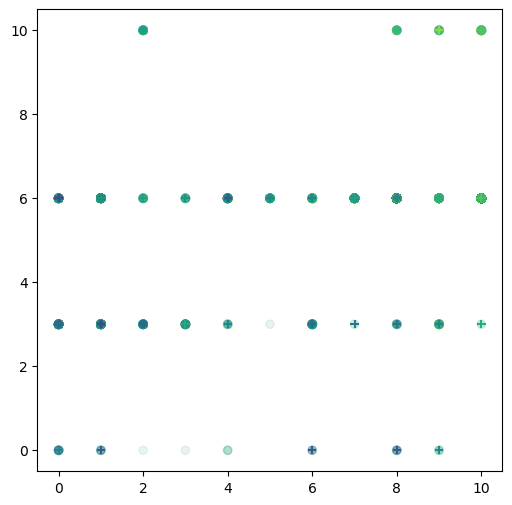

In [579]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)
 
for k in range(1,21):
    
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit( scaler.transform(X_train), y_train )
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

k:  1 | Accuracy 0.26370
k:  2 | Accuracy 0.27508
k:  3 | Accuracy 0.22958
k:  4 | Accuracy 0.25750
k:  5 | Accuracy 0.26680
k:  6 | Accuracy 0.28749
k:  7 | Accuracy 0.28852
k:  8 | Accuracy 0.27301
k:  9 | Accuracy 0.29783
k: 10 | Accuracy 0.29679
k: 11 | Accuracy 0.29059
k: 12 | Accuracy 0.29679
k: 13 | Accuracy 0.28852
k: 14 | Accuracy 0.28542
k: 15 | Accuracy 0.27611
k: 16 | Accuracy 0.27611
k: 17 | Accuracy 0.26887
k: 18 | Accuracy 0.27094
k: 19 | Accuracy 0.28128
k: 20 | Accuracy 0.28128
Min Accuracy: 0.22958 | Max Accuracy 0.29783 | Avg Accuracy 0.27695


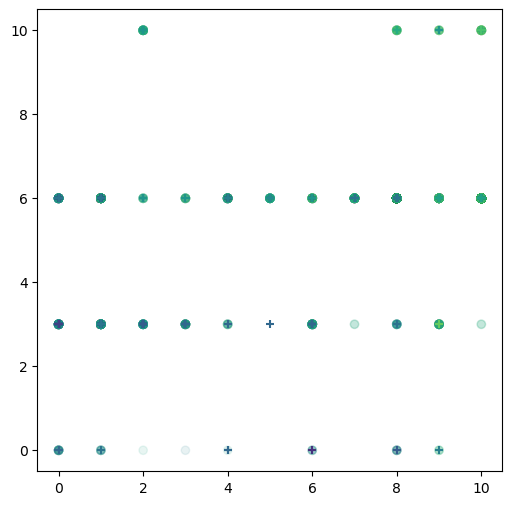

In [580]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for k in range(1,21):

    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(scaler.transform(X_train),y_train)
    y_pred = kNN.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )

print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

k: 20 | Accuracy 0.34230


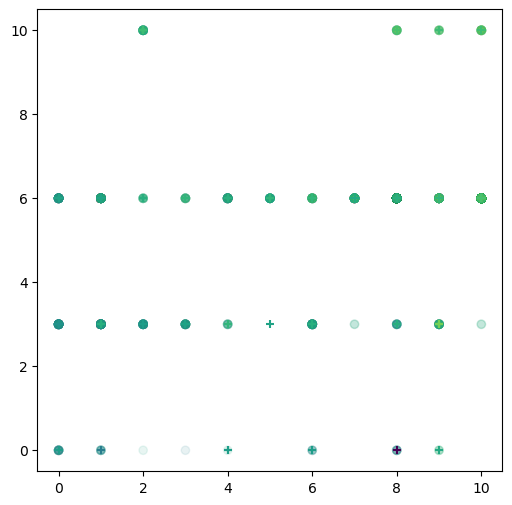

In [581]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

for k in range(1,21):
    gbm = lgb.LGBMClassifier()
    gbm.fit( scaler.transform(X_train), y_train )
    y_pred = gbm.predict( scaler.transform(X_test) )

    # compute Accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc

    if acc < accmin:
        accmin = acc

    if acc > accmax:
        accmax = acc

    accavg += acc
print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1)
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

k:  1 | Accuracy 0.11375
k:  2 | Accuracy 0.13444
k:  3 | Accuracy 0.11479
k:  4 | Accuracy 0.14995
k:  5 | Accuracy 0.14581
k:  6 | Accuracy 0.14478
k:  7 | Accuracy 0.15408
k:  8 | Accuracy 0.16649
k:  9 | Accuracy 0.16443
k: 10 | Accuracy 0.15615
Min Accuracy: 0.11375 | Max Accuracy 0.16649 | Avg Accuracy 0.14168


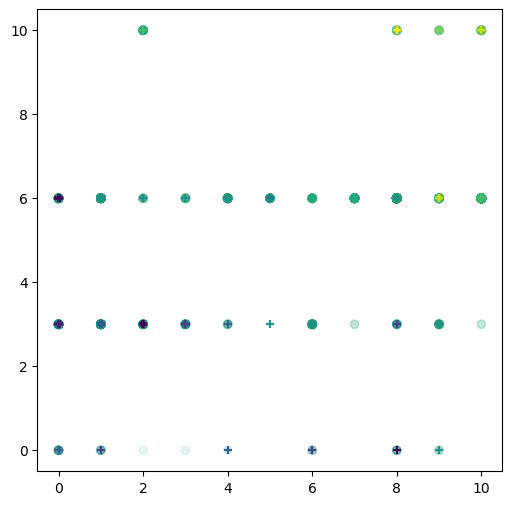

In [582]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

def my_distance(a,b):
    return 10*abs(a[0]-b[0]) + abs(a[1]-b[1])

for k in range(1,11):
    
    kNN = KNeighborsClassifier(n_neighbors = k, 
                                         metric = my_distance)
    kNN.fit( X_train ,y_train)
    y_pred = kNN.predict( X_test )

    # compute accuracy
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
    
    
print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

In [583]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd

Accuracy:  0.3247156153050672


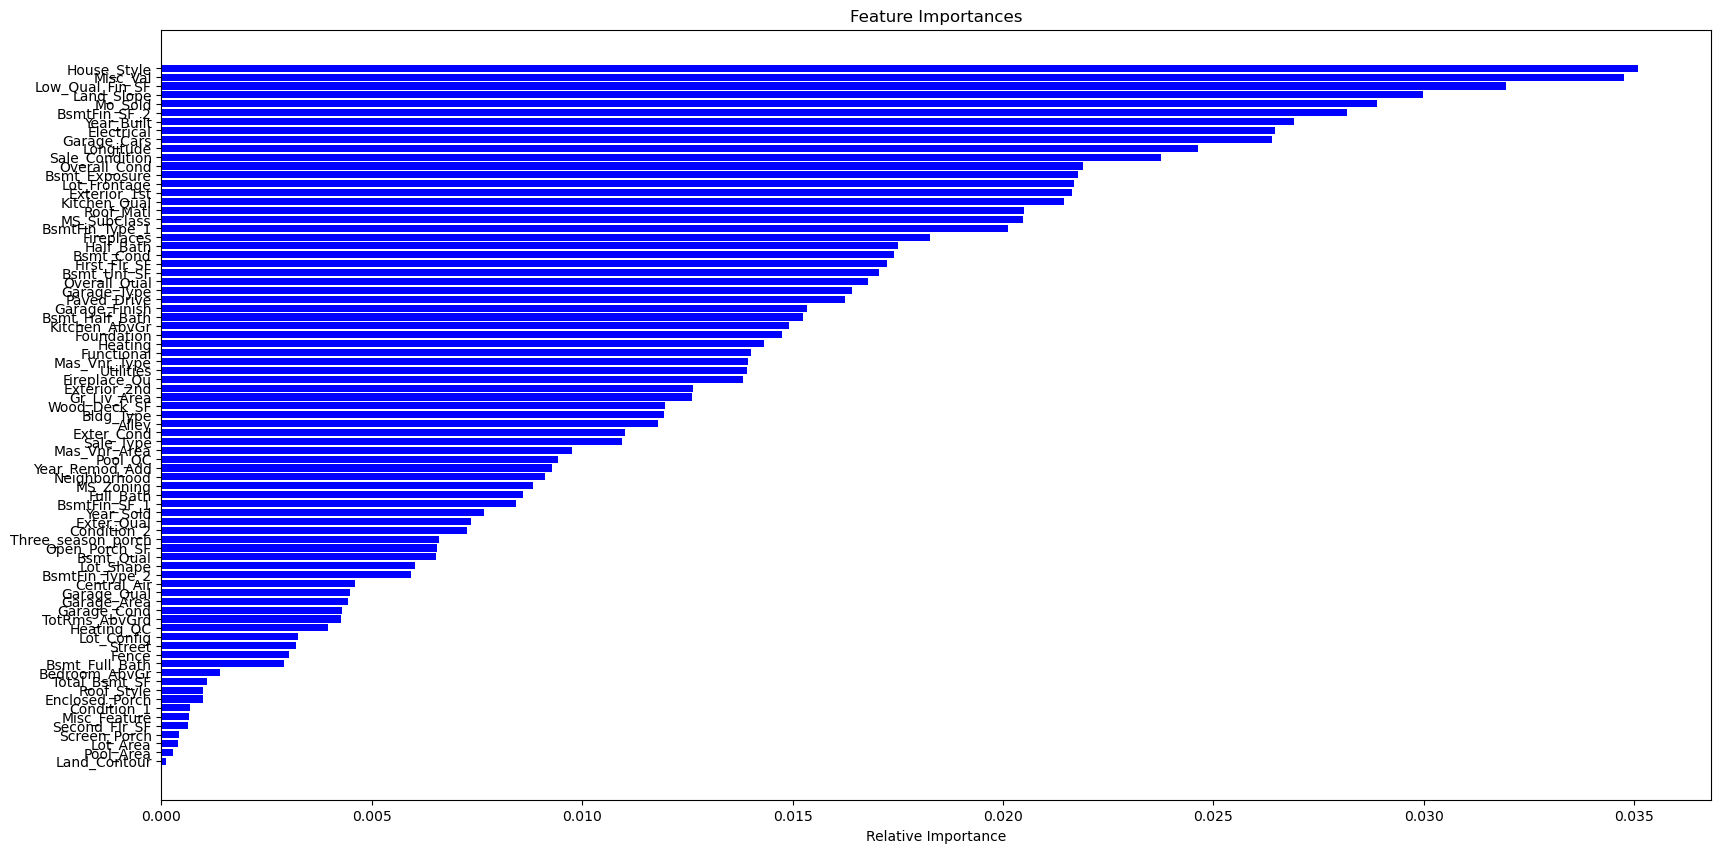

In [584]:
from sklearn.model_selection import train_test_split

#X = dfPearson[predictors]
#y = dfPearson[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# plot the feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [predictors[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#=============DECISION TREES==============# 

Train Accuracy: 0.261 - Test Accuracy: 0.272


Text(0.5, 1.0, 'Decision Tree')

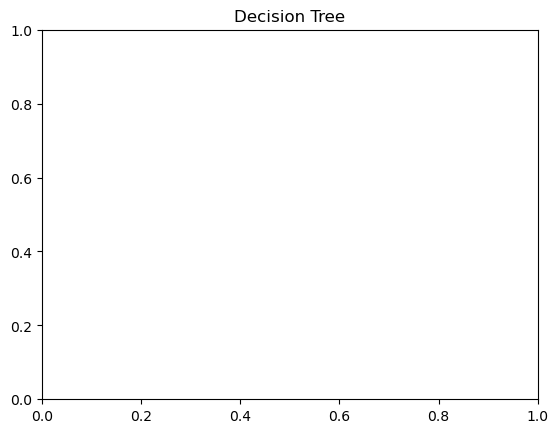

In [585]:
#from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# create a (quasi)random dataset
N_SAMPLES = 1000
N_CENTERS = 6


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = DecisionTreeClassifier(max_depth=52,max_leaf_nodes=12)
dt.fit(X_train,y_train)
# compute Accuracy
train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )

#model_decision_boundary(dt, X_test, y_test)
#plot_decision_boundary(lambda x: dt.predict(x))
plt.title("Decision Tree")

In [587]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_leaves in range(2,1000):
    # train and predict
    dt = DecisionTreeClassifier(max_depth=max_leaves,max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
    # plot
    #fig, ax = plt.subplots(figsize=(6,6))
    #ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
    #ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc
        
    if acc < accmin:
        accmin = acc
        
    if acc > accmax:
        accmax = acc
         
    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )
    
    
print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

Train Accuracy: 0.176 - Test Accuracy: 0.169
Train Accuracy: 0.192 - Test Accuracy: 0.189
Train Accuracy: 0.207 - Test Accuracy: 0.217
Train Accuracy: 0.219 - Test Accuracy: 0.235
Train Accuracy: 0.227 - Test Accuracy: 0.223
Train Accuracy: 0.233 - Test Accuracy: 0.236
Train Accuracy: 0.243 - Test Accuracy: 0.234
Train Accuracy: 0.246 - Test Accuracy: 0.251
Train Accuracy: 0.253 - Test Accuracy: 0.260
Train Accuracy: 0.256 - Test Accuracy: 0.265
Train Accuracy: 0.261 - Test Accuracy: 0.272
Train Accuracy: 0.268 - Test Accuracy: 0.266
Train Accuracy: 0.274 - Test Accuracy: 0.268
Train Accuracy: 0.279 - Test Accuracy: 0.269
Train Accuracy: 0.286 - Test Accuracy: 0.272
Train Accuracy: 0.290 - Test Accuracy: 0.273
Train Accuracy: 0.293 - Test Accuracy: 0.276
Train Accuracy: 0.296 - Test Accuracy: 0.269
Train Accuracy: 0.299 - Test Accuracy: 0.271
Train Accuracy: 0.301 - Test Accuracy: 0.272
Train Accuracy: 0.307 - Test Accuracy: 0.282
Train Accuracy: 0.311 - Test Accuracy: 0.267
Train Accu

Train Accuracy: 0.575 - Test Accuracy: 0.284
Train Accuracy: 0.576 - Test Accuracy: 0.285
Train Accuracy: 0.577 - Test Accuracy: 0.290
Train Accuracy: 0.578 - Test Accuracy: 0.287
Train Accuracy: 0.579 - Test Accuracy: 0.290
Train Accuracy: 0.580 - Test Accuracy: 0.285
Train Accuracy: 0.581 - Test Accuracy: 0.290
Train Accuracy: 0.582 - Test Accuracy: 0.292
Train Accuracy: 0.583 - Test Accuracy: 0.291
Train Accuracy: 0.585 - Test Accuracy: 0.290
Train Accuracy: 0.586 - Test Accuracy: 0.287
Train Accuracy: 0.587 - Test Accuracy: 0.291
Train Accuracy: 0.588 - Test Accuracy: 0.290
Train Accuracy: 0.590 - Test Accuracy: 0.297
Train Accuracy: 0.591 - Test Accuracy: 0.295
Train Accuracy: 0.591 - Test Accuracy: 0.293
Train Accuracy: 0.592 - Test Accuracy: 0.294
Train Accuracy: 0.593 - Test Accuracy: 0.293
Train Accuracy: 0.594 - Test Accuracy: 0.293
Train Accuracy: 0.594 - Test Accuracy: 0.293
Train Accuracy: 0.596 - Test Accuracy: 0.295
Train Accuracy: 0.596 - Test Accuracy: 0.293
Train Accu

Train Accuracy: 0.727 - Test Accuracy: 0.282
Train Accuracy: 0.727 - Test Accuracy: 0.279
Train Accuracy: 0.729 - Test Accuracy: 0.272
Train Accuracy: 0.729 - Test Accuracy: 0.277
Train Accuracy: 0.730 - Test Accuracy: 0.271
Train Accuracy: 0.731 - Test Accuracy: 0.276
Train Accuracy: 0.731 - Test Accuracy: 0.275
Train Accuracy: 0.732 - Test Accuracy: 0.274
Train Accuracy: 0.732 - Test Accuracy: 0.282
Train Accuracy: 0.733 - Test Accuracy: 0.282
Train Accuracy: 0.734 - Test Accuracy: 0.275
Train Accuracy: 0.734 - Test Accuracy: 0.277
Train Accuracy: 0.734 - Test Accuracy: 0.270
Train Accuracy: 0.736 - Test Accuracy: 0.272
Train Accuracy: 0.735 - Test Accuracy: 0.273
Train Accuracy: 0.737 - Test Accuracy: 0.276
Train Accuracy: 0.736 - Test Accuracy: 0.279
Train Accuracy: 0.738 - Test Accuracy: 0.286
Train Accuracy: 0.737 - Test Accuracy: 0.277
Train Accuracy: 0.739 - Test Accuracy: 0.272
Train Accuracy: 0.740 - Test Accuracy: 0.276
Train Accuracy: 0.741 - Test Accuracy: 0.279
Train Accu

Train Accuracy: 0.832 - Test Accuracy: 0.268
Train Accuracy: 0.833 - Test Accuracy: 0.266
Train Accuracy: 0.834 - Test Accuracy: 0.267
Train Accuracy: 0.834 - Test Accuracy: 0.276
Train Accuracy: 0.835 - Test Accuracy: 0.262
Train Accuracy: 0.835 - Test Accuracy: 0.275
Train Accuracy: 0.836 - Test Accuracy: 0.270
Train Accuracy: 0.836 - Test Accuracy: 0.264
Train Accuracy: 0.837 - Test Accuracy: 0.261
Train Accuracy: 0.837 - Test Accuracy: 0.281
Train Accuracy: 0.838 - Test Accuracy: 0.268
Train Accuracy: 0.838 - Test Accuracy: 0.266
Train Accuracy: 0.839 - Test Accuracy: 0.278
Train Accuracy: 0.839 - Test Accuracy: 0.271
Train Accuracy: 0.840 - Test Accuracy: 0.274
Train Accuracy: 0.840 - Test Accuracy: 0.265
Train Accuracy: 0.841 - Test Accuracy: 0.272
Train Accuracy: 0.840 - Test Accuracy: 0.278
Train Accuracy: 0.842 - Test Accuracy: 0.270
Train Accuracy: 0.842 - Test Accuracy: 0.266
Train Accuracy: 0.843 - Test Accuracy: 0.263
Train Accuracy: 0.843 - Test Accuracy: 0.272
Train Accu

Train Accuracy: 0.926 - Test Accuracy: 0.278
Train Accuracy: 0.926 - Test Accuracy: 0.284
Train Accuracy: 0.927 - Test Accuracy: 0.278
Train Accuracy: 0.926 - Test Accuracy: 0.272
Train Accuracy: 0.927 - Test Accuracy: 0.290
Train Accuracy: 0.927 - Test Accuracy: 0.259
Train Accuracy: 0.929 - Test Accuracy: 0.285
Train Accuracy: 0.927 - Test Accuracy: 0.271
Train Accuracy: 0.930 - Test Accuracy: 0.280
Train Accuracy: 0.929 - Test Accuracy: 0.289
Train Accuracy: 0.930 - Test Accuracy: 0.268
Train Accuracy: 0.931 - Test Accuracy: 0.280
Train Accuracy: 0.930 - Test Accuracy: 0.282
Train Accuracy: 0.932 - Test Accuracy: 0.272
Train Accuracy: 0.932 - Test Accuracy: 0.277
Train Accuracy: 0.933 - Test Accuracy: 0.274
Train Accuracy: 0.933 - Test Accuracy: 0.273
Train Accuracy: 0.934 - Test Accuracy: 0.285
Train Accuracy: 0.934 - Test Accuracy: 0.287
Train Accuracy: 0.934 - Test Accuracy: 0.280
Train Accuracy: 0.936 - Test Accuracy: 0.271
Train Accuracy: 0.935 - Test Accuracy: 0.283
Train Accu

Train Accuracy: 1.000 - Test Accuracy: 0.277
Train Accuracy: 1.000 - Test Accuracy: 0.275
Train Accuracy: 1.000 - Test Accuracy: 0.281
Train Accuracy: 1.000 - Test Accuracy: 0.290
Train Accuracy: 1.000 - Test Accuracy: 0.274
Train Accuracy: 1.000 - Test Accuracy: 0.278
Train Accuracy: 1.000 - Test Accuracy: 0.280
Train Accuracy: 1.000 - Test Accuracy: 0.277
Train Accuracy: 1.000 - Test Accuracy: 0.281
Train Accuracy: 1.000 - Test Accuracy: 0.287
Train Accuracy: 1.000 - Test Accuracy: 0.268
Train Accuracy: 1.000 - Test Accuracy: 0.273
Train Accuracy: 1.000 - Test Accuracy: 0.292
Train Accuracy: 1.000 - Test Accuracy: 0.269
Train Accuracy: 1.000 - Test Accuracy: 0.293
Train Accuracy: 1.000 - Test Accuracy: 0.291
Train Accuracy: 1.000 - Test Accuracy: 0.276
Train Accuracy: 1.000 - Test Accuracy: 0.293
Train Accuracy: 1.000 - Test Accuracy: 0.281
Train Accuracy: 1.000 - Test Accuracy: 0.285
Train Accuracy: 1.000 - Test Accuracy: 0.281
Train Accuracy: 1.000 - Test Accuracy: 0.293
Train Accu

In [544]:
from sklearn import tree
from sklearn.metrics import accuracy_score

#X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# train and predict
dt = tree.DecisionTreeClassifier(max_depth=4) # change this!
dt.fit(X_train,y_train)

#model_decision_boundary(dt, X_test, y_test)

ValueError: Unknown label type: 'continuous'

In [588]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

#X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for max_depth in range(2,20):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth,max_leaf_nodes=max_depth)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = accuracy_score(y_true = y_train, y_pred = dt.predict(X_train))
    test_acc  = accuracy_score(y_true = y_test,  y_pred = dt.predict(X_test))
# plot
#fig, ax = plt.subplots(figsize=(6,6))
#ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
#ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');
print ("Train Accuracy: {:.3f} - Test Accuracy: {:.3f}".format(train_acc,test_acc) )
    

Train Accuracy: 0.296 - Test Accuracy: 0.269


In [ ]:
#=================LogisticRegression=================#

In [589]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print ("Accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred) )

Accuracy: 0.26990692864529475


E:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [358]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [593]:
from sklearn.svm import SVC

for k in range(1,100):
    model = SVC(C=k) # try 100, 0.01
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if k <= 1:
        accmin = acc
        accmax = acc
        accavg = acc

    if acc < accmin:
        accmin = acc

    if acc > accmax:
        accmax = acc

    accavg += acc
    print ("k: {:2d} | Accuracy {:.5f}".format(k,acc) )

    
print ("Min Accuracy: {:.5f} | Max Accuracy {:.5f} | Avg Accuracy {:.5f}".format(accmin,accmax,accavg/(k+1)) )
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train.values, alpha=0.1 ,marker='o')
ax.scatter(X_test.values[:,0], X_test.values[:,1], c=y_pred, marker='+');

k:  1 | Accuracy 0.32472
k:  2 | Accuracy 0.32472
k:  3 | Accuracy 0.32472
k:  4 | Accuracy 0.32472
k:  5 | Accuracy 0.32472
k:  6 | Accuracy 0.32472
k:  7 | Accuracy 0.32472
k:  8 | Accuracy 0.32472
k:  9 | Accuracy 0.32472
k: 10 | Accuracy 0.32472
k: 11 | Accuracy 0.32472
k: 12 | Accuracy 0.32472
k: 13 | Accuracy 0.32472
k: 14 | Accuracy 0.32472
k: 15 | Accuracy 0.32472
k: 16 | Accuracy 0.32472
k: 17 | Accuracy 0.32472
k: 18 | Accuracy 0.32472
k: 19 | Accuracy 0.32472
k: 20 | Accuracy 0.32472
k: 21 | Accuracy 0.32472
k: 22 | Accuracy 0.32472
k: 23 | Accuracy 0.32472
k: 24 | Accuracy 0.32472
k: 25 | Accuracy 0.32472
k: 26 | Accuracy 0.32472
k: 27 | Accuracy 0.32472
k: 28 | Accuracy 0.32472
k: 29 | Accuracy 0.32472
k: 30 | Accuracy 0.32472
k: 31 | Accuracy 0.32472
k: 32 | Accuracy 0.32472
k: 33 | Accuracy 0.32472
k: 34 | Accuracy 0.32472
k: 35 | Accuracy 0.32472
k: 36 | Accuracy 0.32472
k: 37 | Accuracy 0.32472
k: 38 | Accuracy 0.32472
k: 39 | Accuracy 0.32472
k: 40 | Accuracy 0.32472


KeyboardInterrupt: 